<a href="https://colab.research.google.com/github/MBrandao07/People_Analytics_CRM/blob/main/Codigos/2_People_Analytics_CRM_Data_Prep_Clusteriza%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3- Data Prep

## 3.1 Importando bibliotecas

In [1]:
# importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, SpectralClustering
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
import time
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

In [2]:
# conectando ao drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# visualizando todas as colunas do dataframe
pd.set_option('display.max_columns', None)

## 3.2 Funções

In [4]:
# Função para gerar os metadados do dataframe
def generate_metadata(dataframe):
    """
    Gera um dataframe contendo metadados das colunas do dataframe fornecido.

    :param dataframe: DataFrame para o qual os metadados serão gerados.
    :return: DataFrame contendo metadados.
    """

    # Coleta de metadados básicos
    metadata = pd.DataFrame({
        'nome_variavel': dataframe.columns,
        'tipo': dataframe.dtypes,
        'qt_nulos': dataframe.isnull().sum(),
        'percent_nulos': round((dataframe.isnull().sum() / len(dataframe))* 100,2),
        'cardinalidade': dataframe.nunique(),
    })
    metadata=metadata.sort_values(by='percent_nulos',ascending=False)
    metadata = metadata.reset_index(drop=True)

    return metadata

## 3.3 Importando a base de dados

In [5]:
df_publico = pd.read_csv('/content/drive/MyDrive/2 - Projetos Portfolio/People Analytics/Base de dados/tb_crm_clientes.csv')
df_publico.head()

,IDCliente,AnoDeNascimento,NivelDeEducacao,EstadoCivil,RendaAnualFamiliar,QtdDeCriancasNaCasa,QtdDeAdolescentesNaCasa,DataDeInscricao,DiasDesdeUltimaCompra,GastoComVinhoNosUltimos2Anos,GastoComFrutasNosUltimos2Anos,GastoComCarneNosUltimos2Anos,GastoComPeixeNosUltimos2Anos,GastoComDocesNosUltimos2Anos,GastoComOuroNosUltimos2Anos,ComprasComDesconto,ComprasNoWeb,ComprasPorCatalogo,ComprasNaLoja,VisitasAoSiteNoUltimoMes,AceitouCampanha3,AceitouCampanha4,AceitouCampanha5,AceitouCampanha1,AceitouCampanha2,ReclamouNosUltimos2Anos,IndicadorCustoContato,IndicadorDeReceita,AceitouUltimaCampanha
0,5524,1957,Graduação,Solteiro(a),58138.0,0,0,2021-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduação,Solteiro(a),46344.0,1,1,2023-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduação,União Estável,71613.0,0,0,2022-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduação,União Estável,26646.0,1,0,2023-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,Doutorado,Casado(a),58293.0,1,0,2023-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


## 3.4 Analisando os metadados

In [6]:
generate_metadata(df_publico)

,nome_variavel,tipo,qt_nulos,percent_nulos,cardinalidade
0,RendaAnualFamiliar,float64,24,1.07,1974
1,IDCliente,int64,0,0.00,2240
2,AnoDeNascimento,int64,0,0.00,59
3,NivelDeEducacao,object,0,0.00,5
4,EstadoCivil,object,0,0.00,8
5,QtdDeCriancasNaCasa,int64,0,0.00,3
6,QtdDeAdolescentesNaCasa,int64,0,0.00,3
7,DataDeInscricao,object,0,0.00,663
8,DiasDesdeUltimaCompra,int64,0,0.00,100
9,GastoComVinhoNosUltimos2Anos,int64,0,0.00,776


## 3.5 Feature Engineering

Na Feature Engineering realizaremos duas etapas:

1- Criar novas variáveis com base nas variáveis existentes;

2- Ajuste do tipo da variáveis existentes (que forem necessárias);

In [7]:
# criando a variável "AceitouAlgumaCampanha"
df_publico['AceitouAlgumaCampanha'] = df_publico[['AceitouCampanha1', 'AceitouCampanha2', 'AceitouCampanha3', 'AceitouCampanha4', 'AceitouCampanha5', 'AceitouUltimaCampanha']].any(axis=1).astype(int)

ano_atual = datetime.now().year
data_atual = datetime.now()

# Criando a variável 'Idade'
df_publico['Idade'] = ano_atual - df_publico['AnoDeNascimento']

# Ajustando o tipo da variável DataDeInscricao
df_publico['DataDeInscricao'] = pd.to_datetime(df_publico['DataDeInscricao'])

# Calculando a quantidade de dias desde a inscrição
df_publico['DiasDesdeInscricao'] = (data_atual - df_publico['DataDeInscricao']).dt.days

# criando a variável "QtdFilhos"
df_publico['QtdFilhos'] = df_publico['QtdDeCriancasNaCasa'] + df_publico['QtdDeAdolescentesNaCasa']

# Criando uma variável contando a quantidade de pessoas na residência de cada cliente
def calcular_total_pessoas(row):
    if row['EstadoCivil'] == 'Casado(a)' or row['EstadoCivil'] == 'União Estável':
        return row['QtdDeCriancasNaCasa'] + row['QtdDeAdolescentesNaCasa'] + 2
    else:
        return row['QtdDeCriancasNaCasa'] + row['QtdDeAdolescentesNaCasa'] + 1

# Aplicando a função para calcular a quantidade total de pessoas na casa
df_publico['TotalPessoasNaCasa'] = df_publico.apply(calcular_total_pessoas, axis=1)

# Calcular a renda per capita familiar
df_publico['RendaAnualPerCapitaFamiliar'] = df_publico['RendaAnualFamiliar'] / df_publico['TotalPessoasNaCasa']

In [8]:
df_publico.head()

,IDCliente,AnoDeNascimento,NivelDeEducacao,EstadoCivil,RendaAnualFamiliar,QtdDeCriancasNaCasa,QtdDeAdolescentesNaCasa,DataDeInscricao,DiasDesdeUltimaCompra,GastoComVinhoNosUltimos2Anos,GastoComFrutasNosUltimos2Anos,GastoComCarneNosUltimos2Anos,GastoComPeixeNosUltimos2Anos,GastoComDocesNosUltimos2Anos,GastoComOuroNosUltimos2Anos,ComprasComDesconto,ComprasNoWeb,ComprasPorCatalogo,ComprasNaLoja,VisitasAoSiteNoUltimoMes,AceitouCampanha3,AceitouCampanha4,AceitouCampanha5,AceitouCampanha1,AceitouCampanha2,ReclamouNosUltimos2Anos,IndicadorCustoContato,IndicadorDeReceita,AceitouUltimaCampanha,AceitouAlgumaCampanha,Idade,DiasDesdeInscricao,QtdFilhos,TotalPessoasNaCasa,RendaAnualPerCapitaFamiliar
0,5524,1957,Graduação,Solteiro(a),58138.0,0,0,2021-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,1,68,1585,0,1,58138.0
1,2174,1954,Graduação,Solteiro(a),46344.0,1,1,2023-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,0,71,739,2,3,15448.0
2,4141,1965,Graduação,União Estável,71613.0,0,0,2022-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,0,60,1086,0,2,35806.5
3,6182,1984,Graduação,União Estável,26646.0,1,0,2023-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,0,41,679,1,3,8882.0
4,5324,1981,Doutorado,Casado(a),58293.0,1,0,2023-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,0,44,935,1,3,19431.0


## 3.6 Encoding

A etapa de Encoding será realizada como um pipeline utilizando os seguintes passos:

1- Preenchimento dos valores nulos pela **mediana nas variáveis numéricas** e pela **moda nas variáveis categóricas** utilizando o **SimpleInputer**;

2- **Padronização das variáveis numéricas utilizando RobustScaler**, pois o dataset possui muitos outliers;

3- **Aplicação de One-Hot-Encoding nas variáveis categóricas**, pois sua cardinalidade é baixa;

4- Criação de um novo dataframe com as colunas processadas.

In [9]:
# verificando os tipos de colunas e quantidades
df_publico.dtypes.value_counts()

,count
int64,30
object,2
float64,2
datetime64[ns],1


In [10]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, OneHotEncoder

# removendo as colunas que não precisam ser processadas
X = df_publico.drop(columns=['IDCliente','AnoDeNascimento','DataDeInscricao'])

# selecionando as colunas categóricas
cat_attributes = X.select_dtypes(include='object')

# selecionando as colunas numéricas
num_attributes = X.select_dtypes(exclude='object')

# Definindo a pipeline categórica
cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first'))
])

# Definindo a pipeline numérica utilizando RobustScaler
num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])

# Combinando as duas pipelines
preprocessor = ColumnTransformer([
    ('cat', cat_pipe, cat_attributes.columns),
    ('num', num_pipe, num_attributes.columns)
])

pipeline = Pipeline(steps=[("preprocessor", preprocessor)])

# Aplica o pipeline à base de dados
X_processed = pipeline.fit_transform(X)

# Obtém os nomes das colunas após o one-hot encoding
encoded_cat_columns = pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']\
    .get_feature_names_out(input_features=cat_attributes.columns)

# Combina os nomes das colunas categóricas codificadas e as colunas numéricas
all_columns = list(encoded_cat_columns) + list(num_attributes.columns)

# Cria um DataFrame com as colunas pré-processadas e seus nomes
df_X_processed = pd.DataFrame(X_processed, columns=all_columns)

In [11]:
df_X_processed.head()

,NivelDeEducacao_Ensino Médio,NivelDeEducacao_Fundamental,NivelDeEducacao_Graduação,NivelDeEducacao_Mestrado,EstadoCivil_Curtindo a vida,EstadoCivil_Divorciado(a),EstadoCivil_Não Informado,EstadoCivil_Solteiro(a),EstadoCivil_Sozinho(a),EstadoCivil_União Estável,EstadoCivil_Viúvo(a),RendaAnualFamiliar,QtdDeCriancasNaCasa,QtdDeAdolescentesNaCasa,DiasDesdeUltimaCompra,GastoComVinhoNosUltimos2Anos,GastoComFrutasNosUltimos2Anos,GastoComCarneNosUltimos2Anos,GastoComPeixeNosUltimos2Anos,GastoComDocesNosUltimos2Anos,GastoComOuroNosUltimos2Anos,ComprasComDesconto,ComprasNoWeb,ComprasPorCatalogo,ComprasNaLoja,VisitasAoSiteNoUltimoMes,AceitouCampanha3,AceitouCampanha4,AceitouCampanha5,AceitouCampanha1,AceitouCampanha2,ReclamouNosUltimos2Anos,IndicadorCustoContato,IndicadorDeReceita,AceitouUltimaCampanha,AceitouAlgumaCampanha,Idade,DiasDesdeInscricao,QtdFilhos,TotalPessoasNaCasa,RendaAnualPerCapitaFamiliar
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.206299,0.0,0.0,0.18,0.960458,2.50000,2.217593,3.404255,2.50000,1.361702,0.5,1.00,2.00,-0.2,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.722222,1.329463,-1.0,-2.0,2.001690
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.153812,1.0,1.0,-0.22,-0.338189,-0.21875,-0.282407,-0.212766,-0.21875,-0.382979,0.0,-0.75,-0.25,-0.6,-0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.888889,-1.126270,1.0,0.0,-0.162359
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.617737,0.0,0.0,-0.46,0.525494,1.28125,0.277778,2.106383,0.40625,0.382979,-0.5,1.00,0.00,1.0,-0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.277778,-0.119013,-1.0,-1.0,0.869658
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.755259,1.0,0.0,-0.46,-0.338189,-0.12500,-0.217593,-0.042553,-0.15625,-0.404255,0.0,-0.50,-0.50,-0.2,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.777778,-1.300435,0.0,0.0,-0.495203
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.211032,1.0,0.0,0.90,-0.001041,1.09375,0.236111,0.723404,0.59375,-0.191489,1.5,0.25,0.25,0.2,-0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.611111,-0.557329,0.0,0.0,0.039548


## 3.7 Reduzindo a dimensionalidade para a clusterização

In [12]:
df_X_processed.shape

(2240, 41)

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
pca.fit(df_X_processed)
df_reduced = pca.transform(df_X_processed)
df_reduced.shape

(2240, 20)

# 4- Modelagem (Clusterização)

## 4.1 K-Means

### 4.1.1 Método da Silhueta

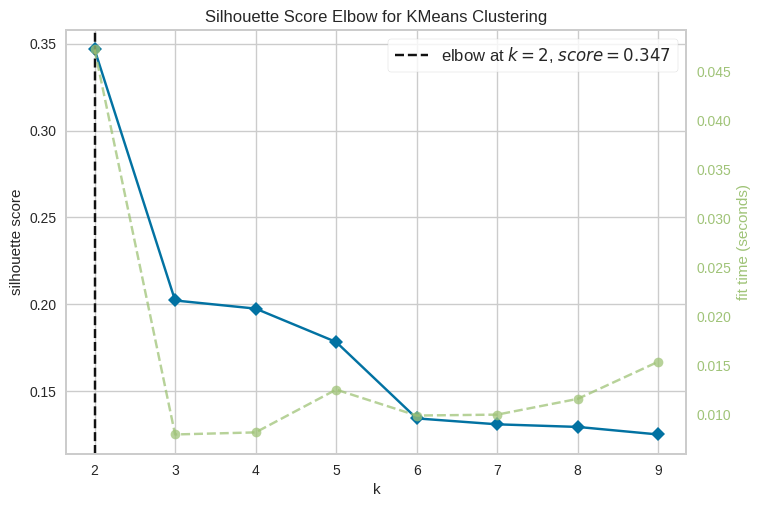

In [14]:
# Utilizando o método da silhueta para verificar a quantidade de clusters

from yellowbrick.cluster import KElbowVisualizer

# definindo k-means como o modelo
model = KMeans(random_state=0, n_init='auto')

# k é o range de cluster que iremos analisar
visualizer = KElbowVisualizer(model, k=(2,10),metric='silhouette', timings= True);
visualizer.fit(df_reduced)
visualizer.show();

Como o Método da Silhueta definiu que 2 clusters era a melhor opção, vamos tentar o Modelo de Mistura Gaussiana.

## 4.2 Modelo de Mistura Gaussiana

### 4.2.1 Selecionando a melhor configuração do modelo

In [15]:
from sklearn.mixture import GaussianMixture

n_components = range(1, 10)
covariance_type = ['spherical', 'tied', 'diag', 'full']
best_bic = float('inf')  # Inicialize com um valor infinito
best_config = None
bic_scores = []

for cov in covariance_type:
    for n_comp in n_components:
        gmm = GaussianMixture(n_components=n_comp, covariance_type=cov, random_state=0)
        gmm.fit(df_reduced)
        bic_score = gmm.bic(df_reduced)
        bic_scores.append((cov, n_comp, bic_score))

        if bic_score < best_bic:
            best_bic = bic_score
            best_config = (cov, n_comp)

print("Melhor configuração:", best_config)
print("Menor BIC:", best_bic)

Melhor configuração: ('full', 8)
Menor BIC: 58574.00552033311


## 4.2.2 Visualizando AIC e BIC visualmente

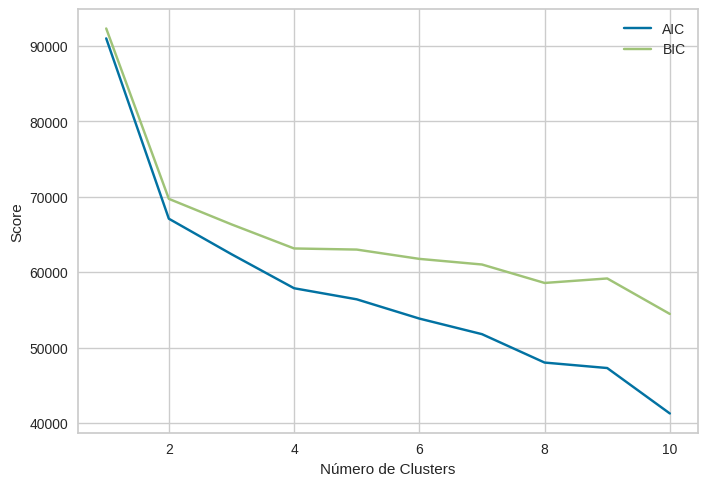

In [16]:
# Lista para armazenar valores de AIC e BIC
aic_scores = []
bic_scores = []

# Testar diferentes números de clusters
for n_clusters in range(1, 11):
    gmm = GaussianMixture(n_components=n_clusters, covariance_type='full', random_state=0)
    gmm.fit(df_reduced)
    aic_scores.append(gmm.aic(df_reduced))
    bic_scores.append(gmm.bic(df_reduced))

# Plotar AIC e BIC em função do número de clusters

plt.plot(range(1, 11), aic_scores, label='AIC')
plt.plot(range(1, 11), bic_scores, label='BIC')
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.legend()
plt.show()

Este modelo apresentou um número maior de clusters, então utilizaremos ele para gerar nossos clusters.

## 4.3 Treinando o Modelo de Mistura Gaussiana

In [17]:
# Inicializar o modelo de Mistura Gaussiana
gmm = GaussianMixture(n_components=8, covariance_type='full', random_state=0)

# Ajustar o modelo aos dados com parâmetros de inicialização específicos
gmm.fit(df_reduced)

# Prever os rótulos dos clusters
labels = gmm.predict(df_reduced)

df_publico['Cluster'] = labels

np.unique(labels)

array([0, 1, 2, 3, 4, 5, 6, 7])

## 4.4 Analisando os clusters gerados

### 4.4.1 Verificando a quantida de pessoas por cluster

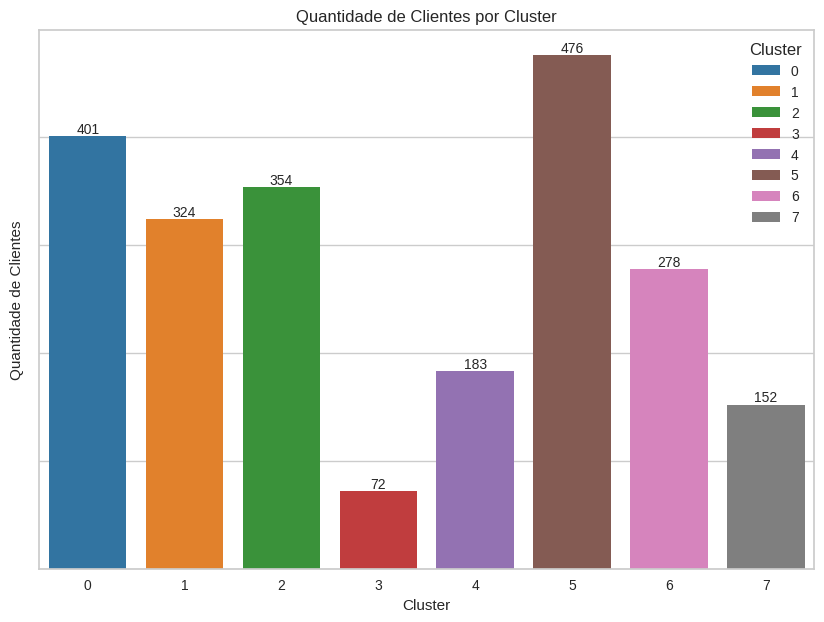

In [18]:
pal = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']
pal = pal[:len(np.unique(labels))]

plt.figure(figsize=(10,7))
pl = sns.countplot(data=df_publico, x="Cluster",hue="Cluster",palette=pal)

for i in range(len(pl.containers)):
  pl.bar_label(pl.containers[i], fontsize=10)
pl.set_title("Quantidade de Clientes por Cluster")
plt.gca().axes.yaxis.set_ticklabels([])
plt.ylabel('Quantidade de Clientes')
plt.show()

* Podemos notar que o cluster 5 é o que possui mais clientes, com 476 pessoas;

* Porém os clusters 0, 1 e 2 seguem logo atrás com pelo menos 324 pessoas em cada;

* O cluster com menos pessoas é o cluster 3, que possui apenas 72 clientes.

### 4.4.2 Taxa de aceitação por cluster

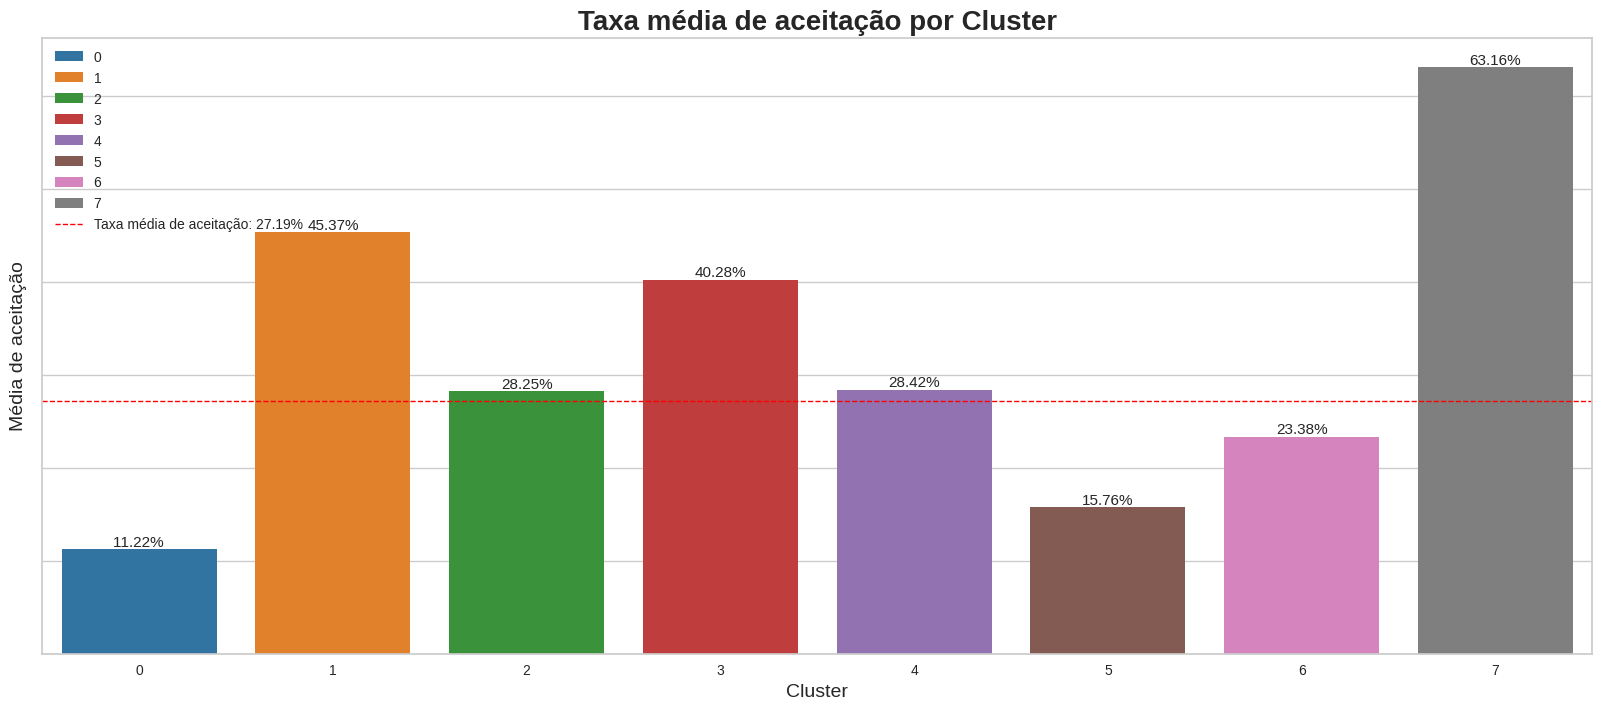

In [19]:
df_publico['TARGET'] = (df_publico['AceitouAlgumaCampanha'] == 1).astype(int)

# Calculando a média da variável de aceitacao
taxa_media_aceitacao = df_publico['AceitouAlgumaCampanha'].value_counts(normalize=True).get(1, 0)

# Calcular a média da variável "AceitouAlgumaCampanha" para cada cluster
mean_aceitacao_by_cluster = df_publico.groupby("Cluster")["TARGET"].mean().reset_index()

# Plotar o gráfico de barras
plt.figure(figsize=(20, 8))
sns.barplot(x="Cluster", y="TARGET", data=mean_aceitacao_by_cluster, palette=pal, hue="Cluster")
plt.axhline(taxa_media_aceitacao, color='red', linestyle='dashed', linewidth=1, label='Taxa média de aceitação: {:.2f}%'.format(taxa_media_aceitacao * 100))

plt.title("Taxa média de aceitação por Cluster", fontsize=20, fontweight='bold')
plt.xlabel("Cluster", fontsize=14)
plt.ylabel("Média de aceitação", fontsize=14)



# Adicionando os valores das taxas de aceitacao nas barras
for i, taxa in enumerate(mean_aceitacao_by_cluster.TARGET.values):
    plt.text(i, taxa, '{:.2f}%'.format(taxa * 100), ha='center', va='bottom', fontsize=11)

plt.gca().axes.yaxis.set_ticklabels([])
plt.legend(loc='upper left')
plt.show()

* O cluster 7 é disparado o cluster com maior taxa de aceitação, com 63,16%;

* Além do cluster 7, temos outros 4 clusters que estão acima da média, sendo os clusters 1 (45,37%), 2 (28,25%), 3 (40,28%) e 4 (28,42%);

* O grupo com menor aceitação é o cluster 0, com 11,22% de taxa de aceitação, seguido dos clusters 5 (com 15,76%) e o 6 (com 23,38%).

### 4.4.3 Verificando as variáveis categóricas por cluster

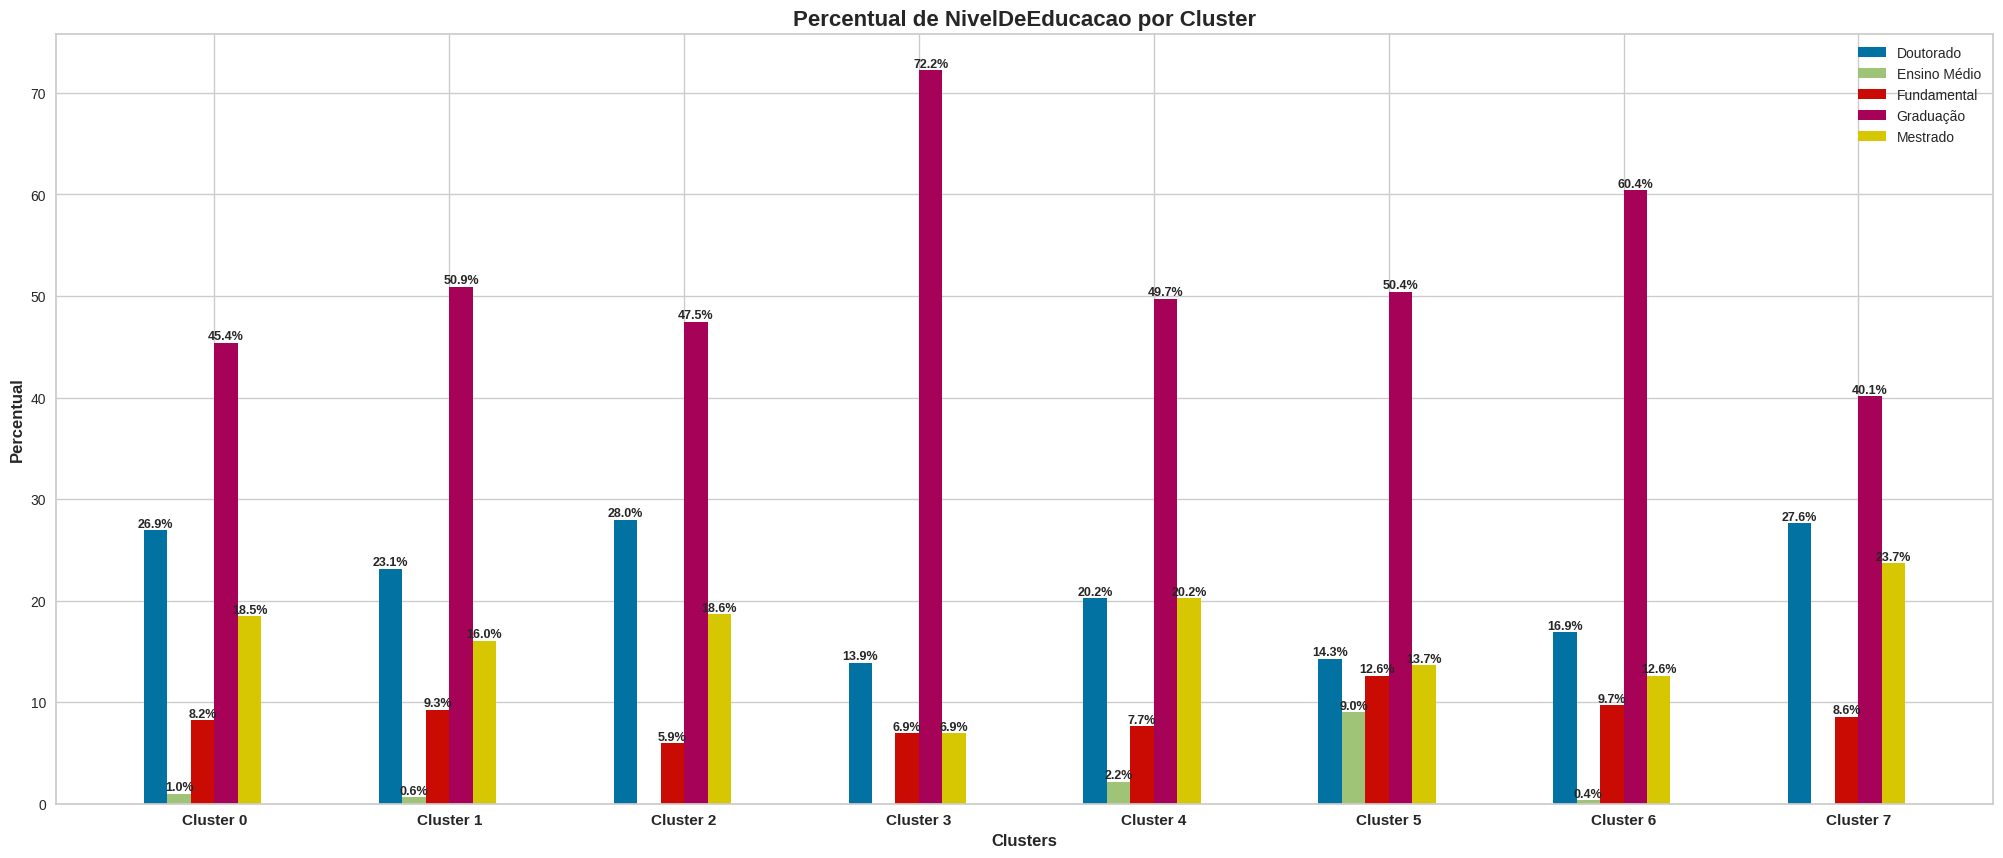

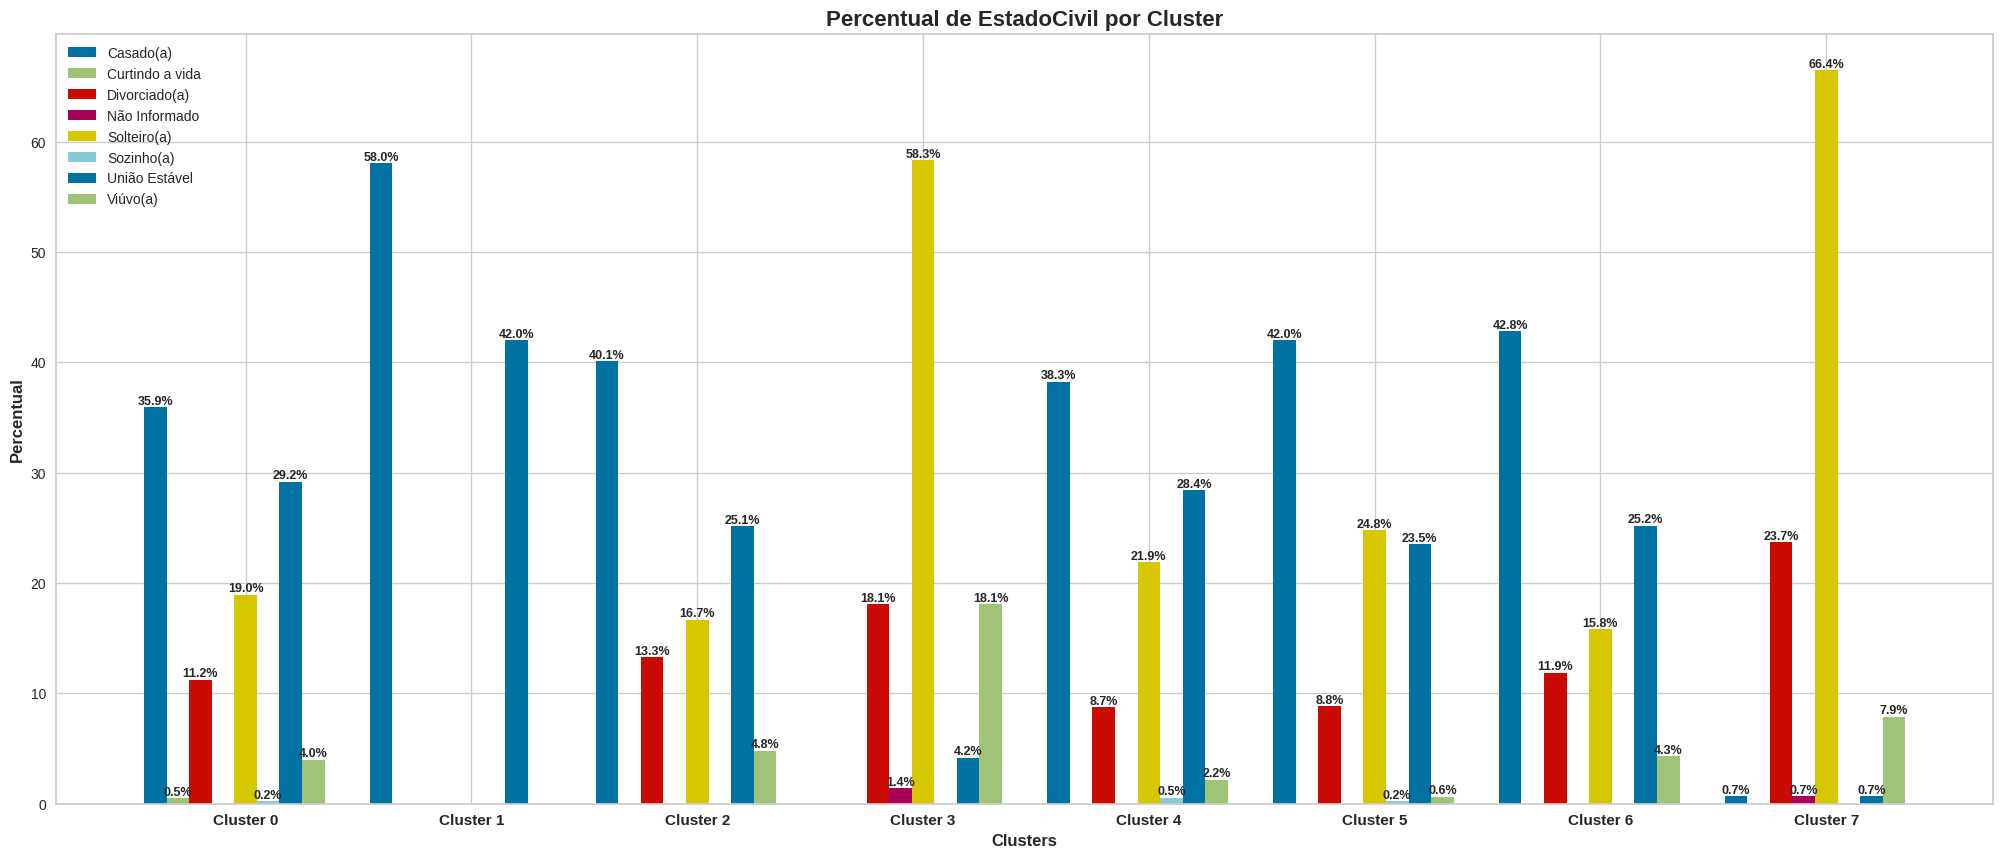

In [20]:
# Variáveis a serem analisadas:
vars1 = list(cat_attributes.columns).copy()

vars_categoricas = vars1

for var in vars_categoricas:
  percentuais_por_cluster = df_publico.groupby('Cluster')[var].value_counts(normalize=True).mul(100).unstack().reset_index().values

  # Extrair os clusters e os percentuais de satisfação
  clusters = percentuais_por_cluster[:, 0]
  percentuais = percentuais_por_cluster[:, 1:]

  # Largura da barra
  bar_width = 0.1

  # Coordenadas das barras
  x = np.arange(len(clusters))

  # Plotar o gráfico de barras
  plt.figure(figsize=(25, 10))

  unicos = sorted(df_publico[var].unique())
  for i in range(len(percentuais[0])):
      j = unicos[i]
      plt.bar(x + i * bar_width, percentuais[:, i], bar_width, label=f'{j}')
      for j, val in enumerate(percentuais[:, i]):
          plt.text(x[j] + i * bar_width, val, '{:.1f}%'.format(val), ha='center', va='bottom', fontsize=9, fontweight='bold');

  # Adicionar rótulos e título
  plt.xlabel('Clusters', fontsize=12, fontweight='bold');
  plt.ylabel('Percentual', fontsize=12, fontweight='bold');
  plt.title(f'Percentual de {var} por Cluster', fontsize=16, fontweight='bold');
  plt.xticks(x + bar_width * len(percentuais[0]) / 2, [f'Cluster {int(cluster)}' for cluster in clusters], fontsize=11, fontweight='bold');
  plt.legend(loc='best');

  # Mostrar o gráfico
  plt.show();

Insights:

- Nível de Educação

 - Em todos os cluster a Graduação é predominante, seguida de Doutorados;

 - Os clusters 2, 3 e 7 não possuem pessoas que possuem apenas Ensino Médio.

- Estado Civil

 - O cluster 1 possui apenas pessoas casadas ou em união estável;

 - Os clusters 0, 1, 2, 4, 5 e 6 possuem pessoas casadas como estado civil predominante;

 - Já os clusters 3 e 7 possuem solteiros como a grande maioria, possuindo 58,3% e 66,4% da base como solteiros respectivamente;

 - O cluster 0 possui as duas pessoas que definiram seu estado civil como "Curtindo a vida";

 - Já as pessoas que selecionaram "Não informado" estão divididas entre os clusters 3 e 7.

### 4.4.4 Verificando as variáveis numéricas por cluster

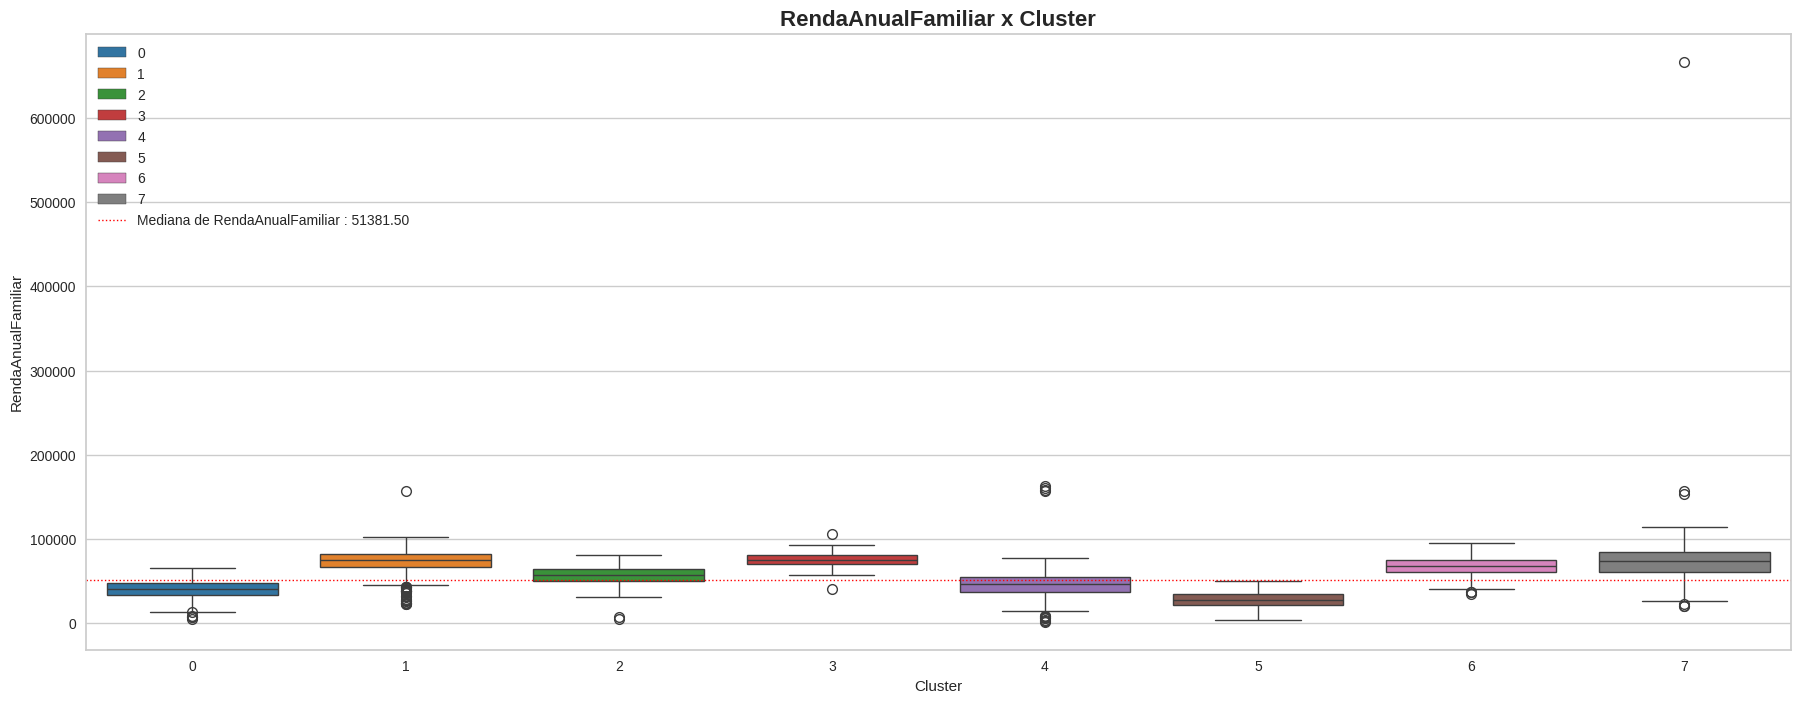

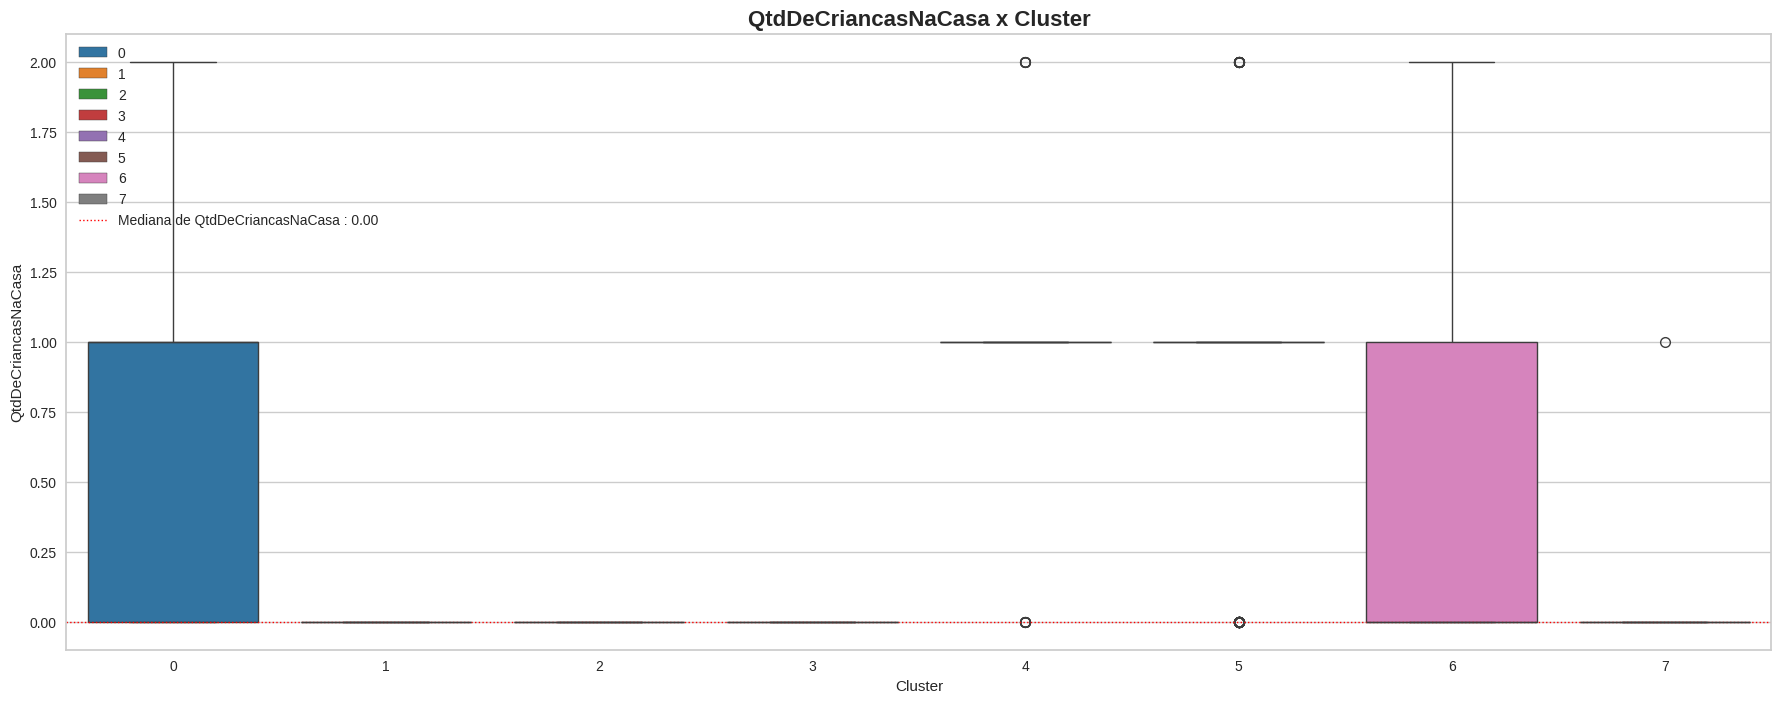

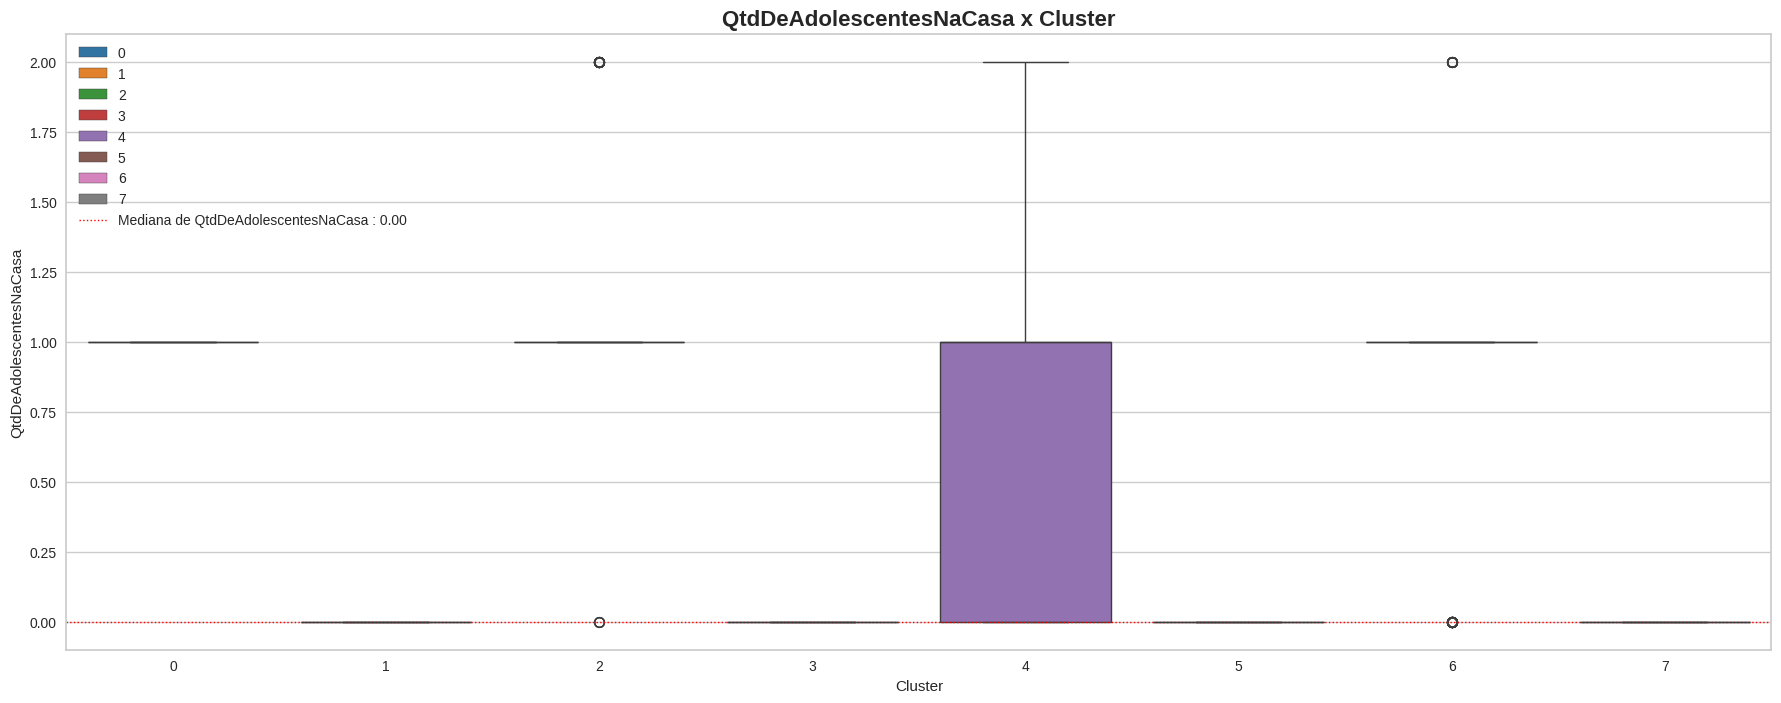

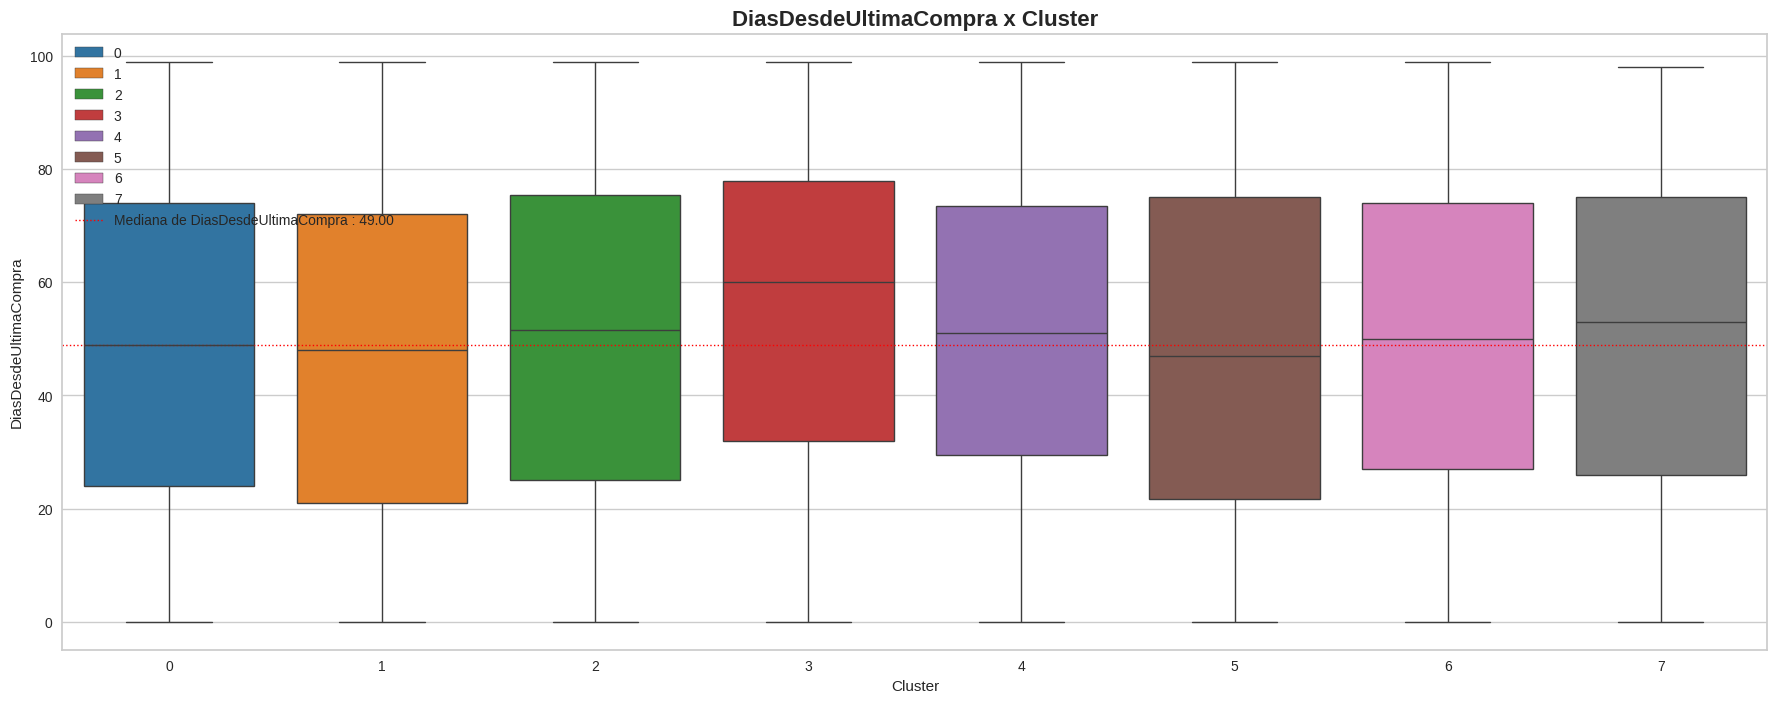

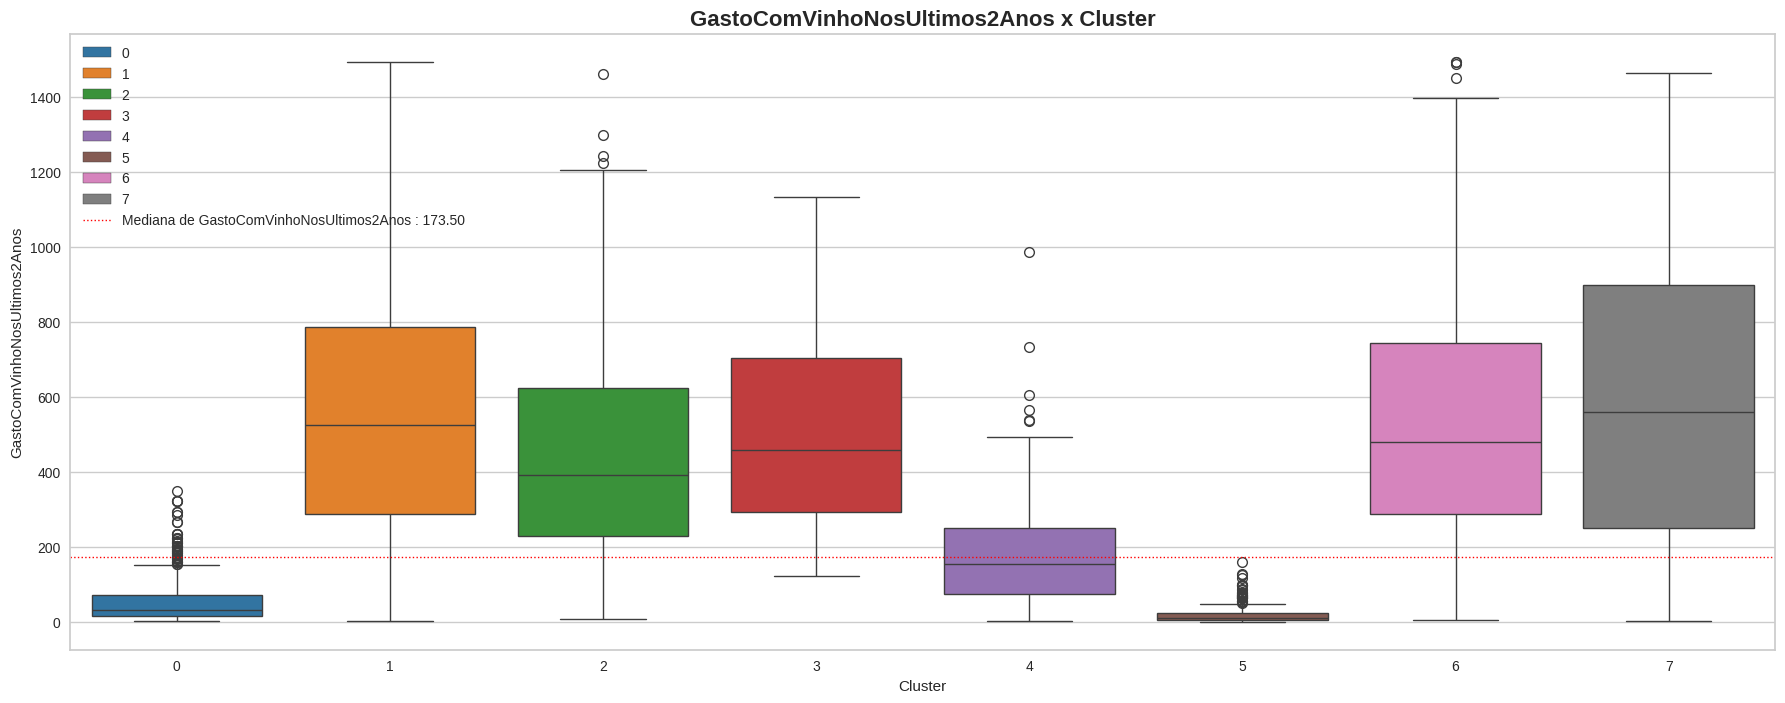

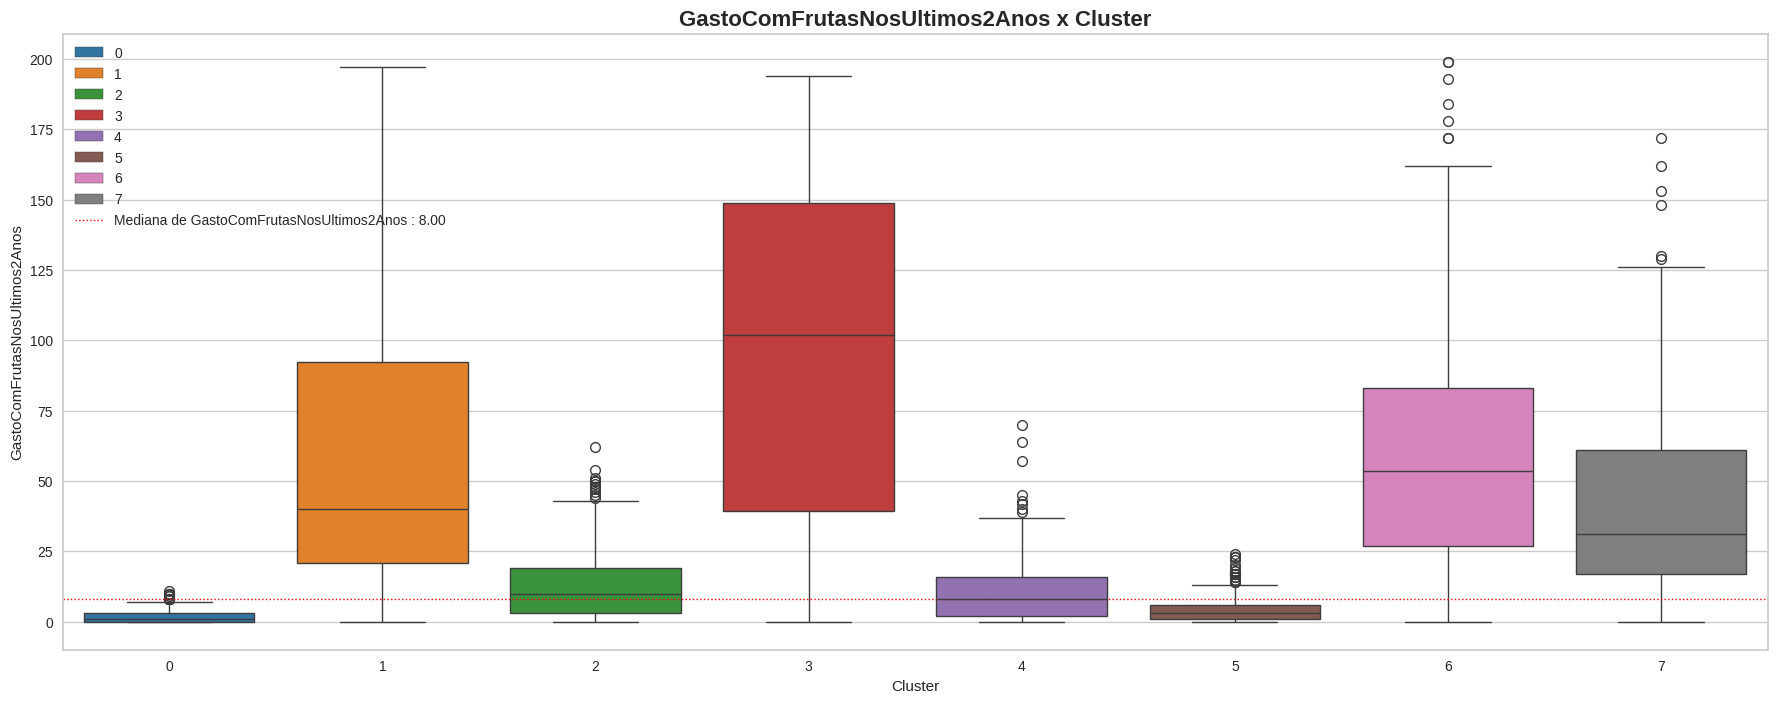

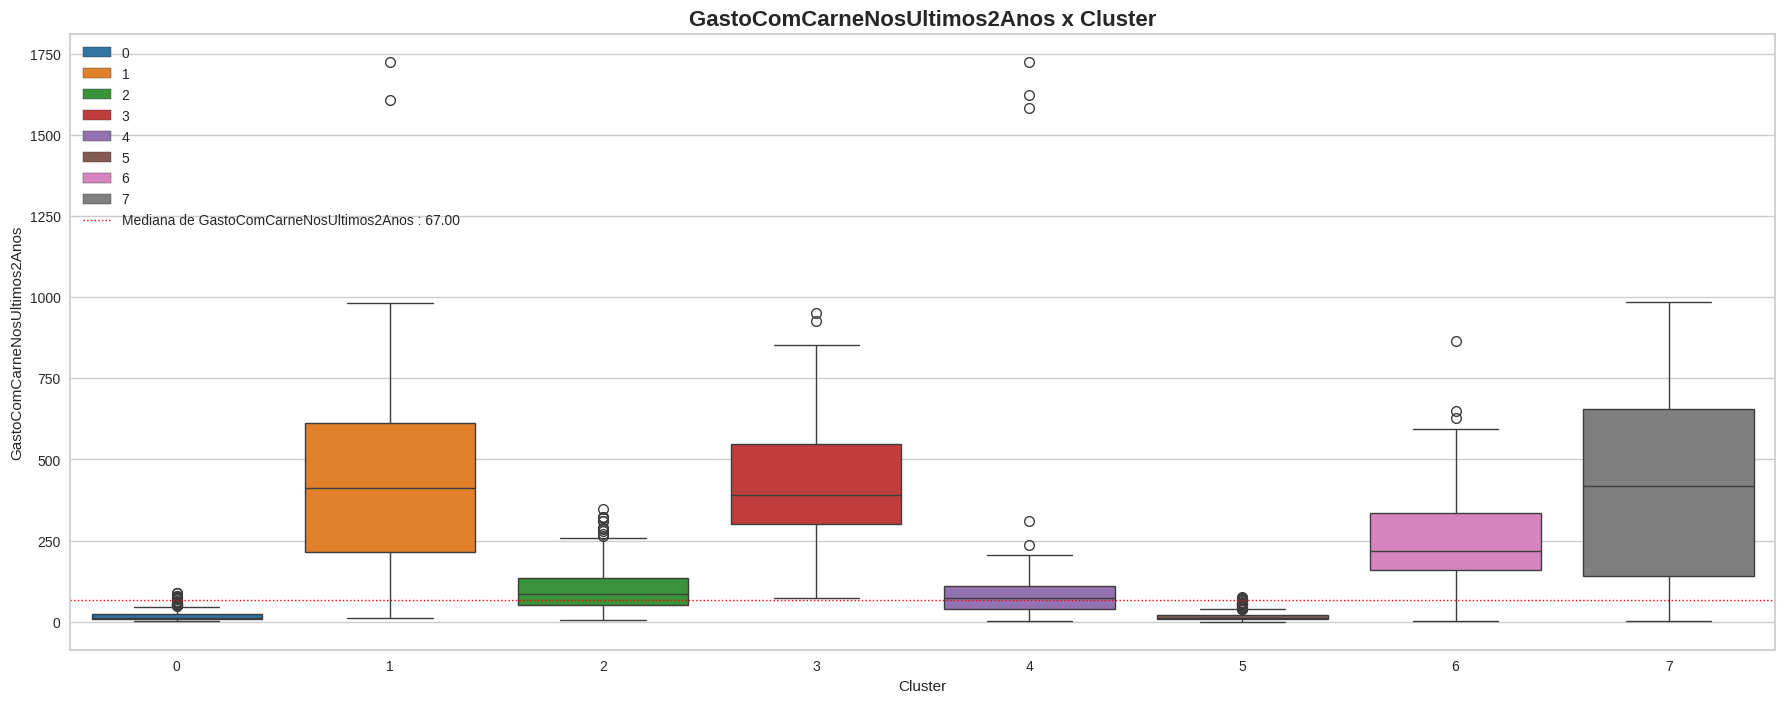

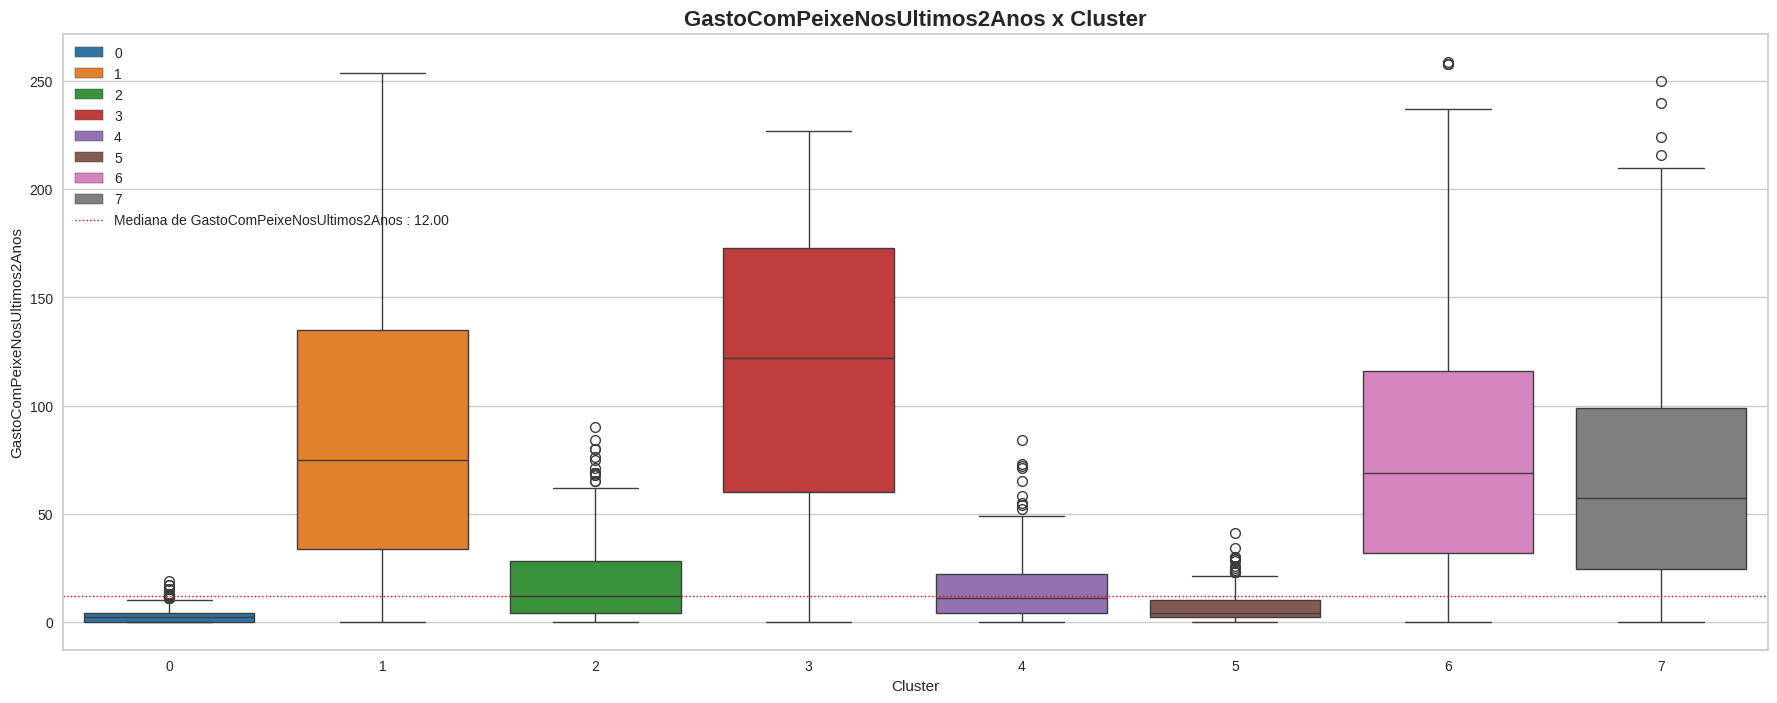

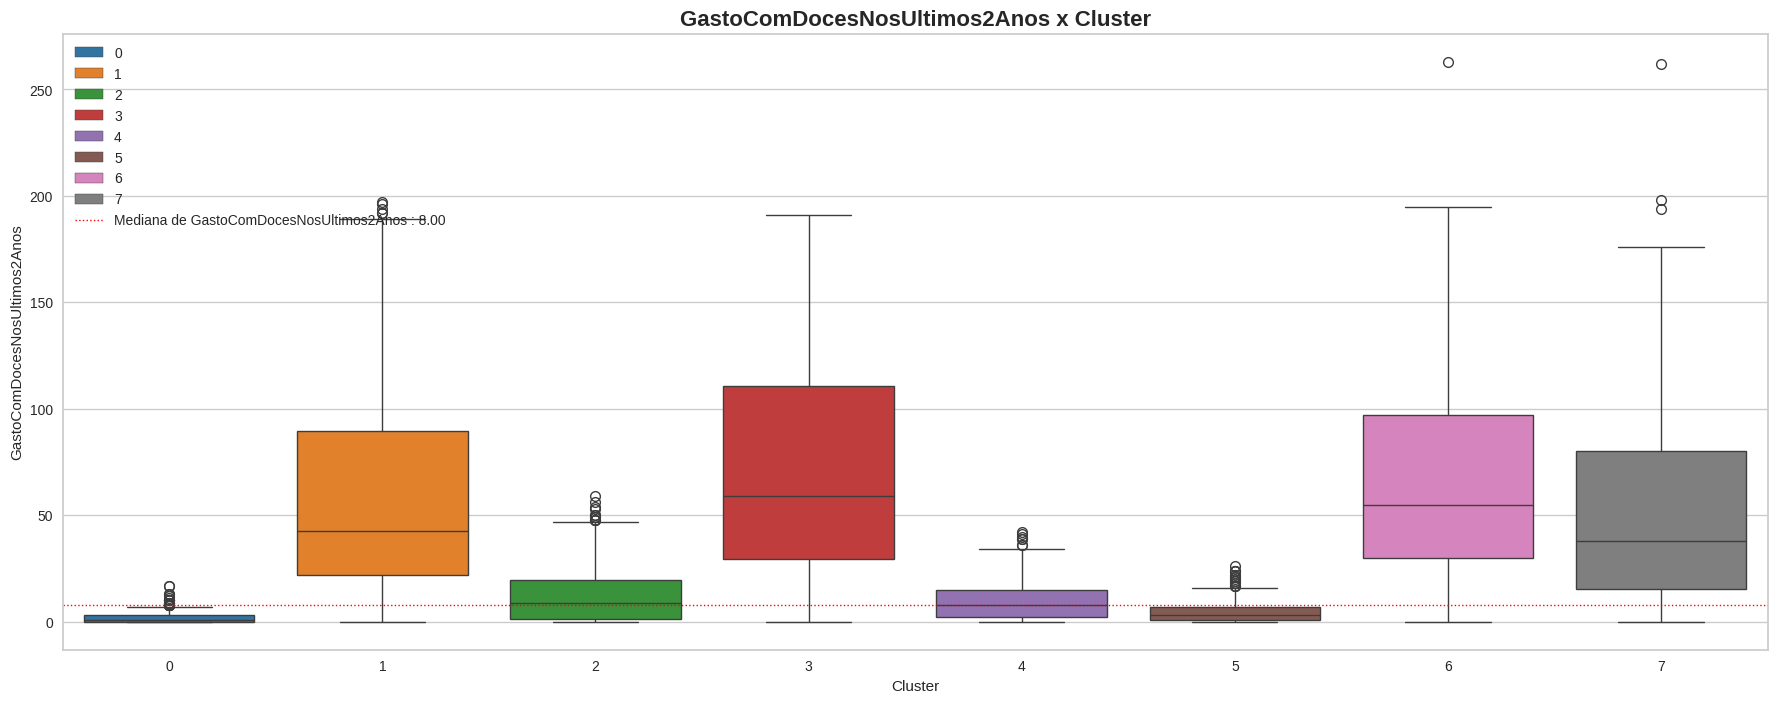

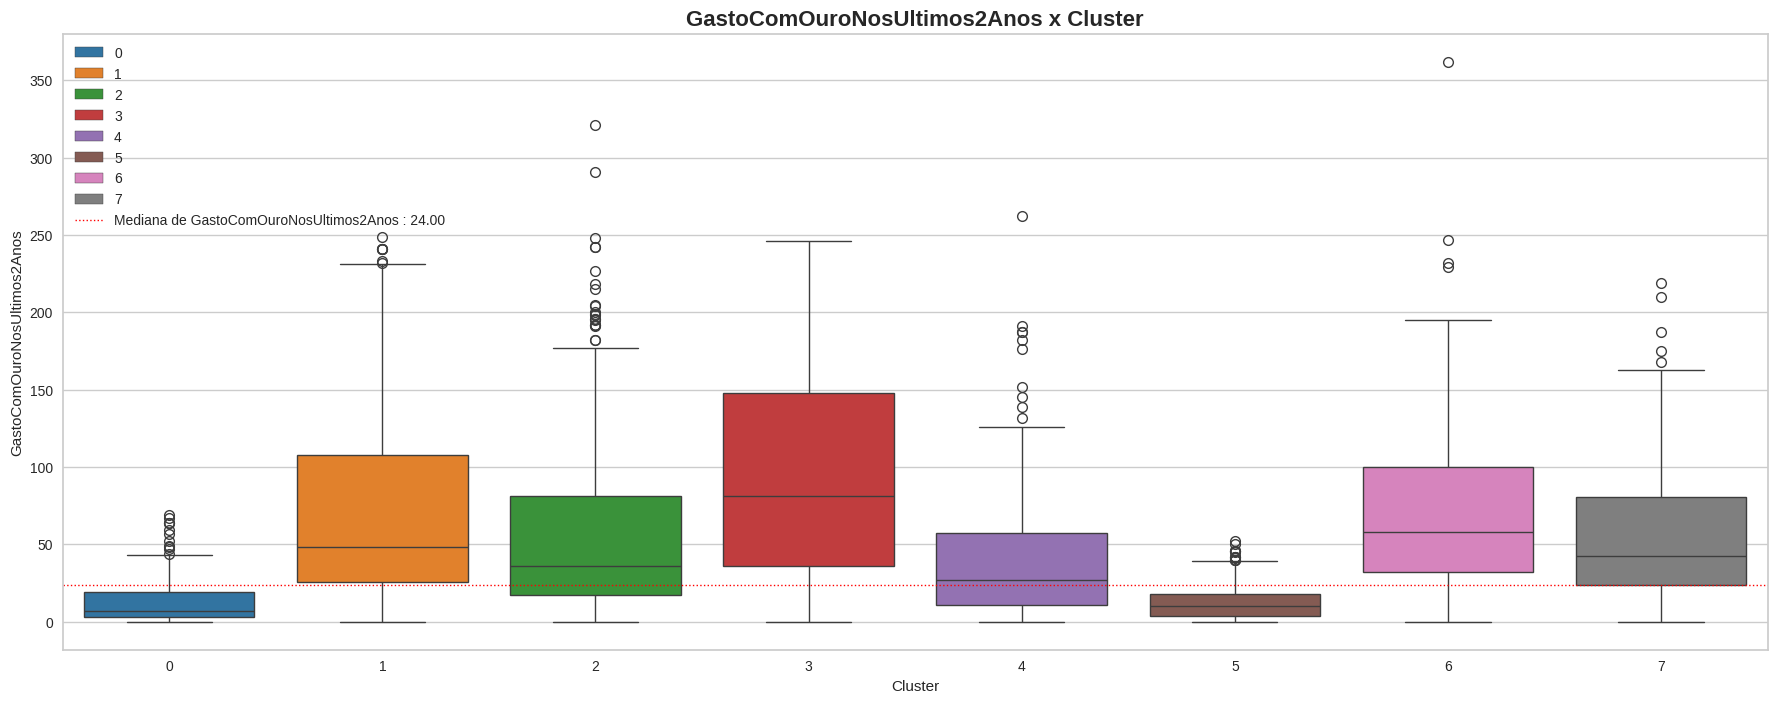

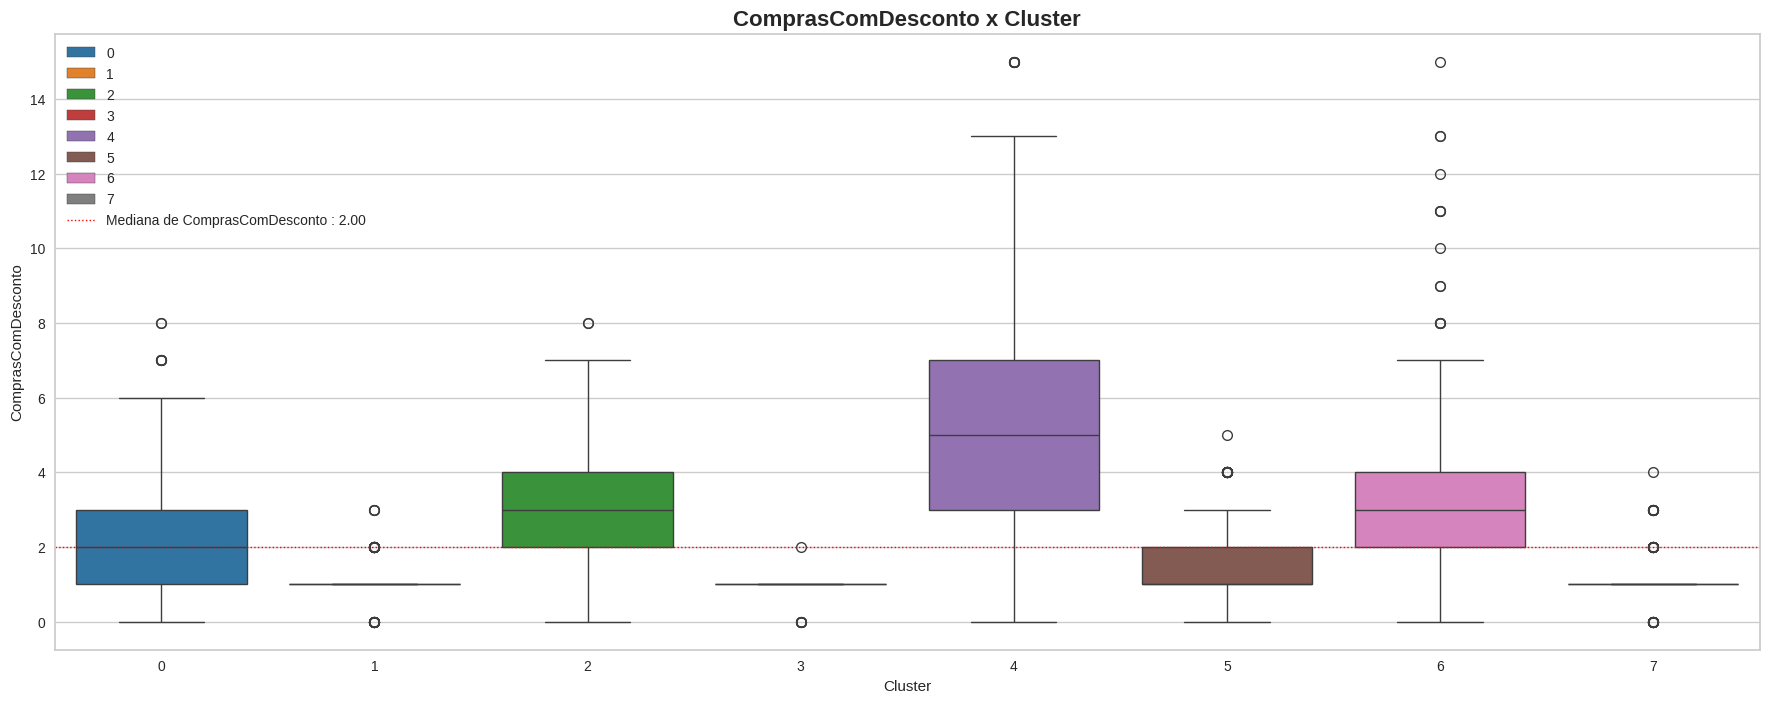

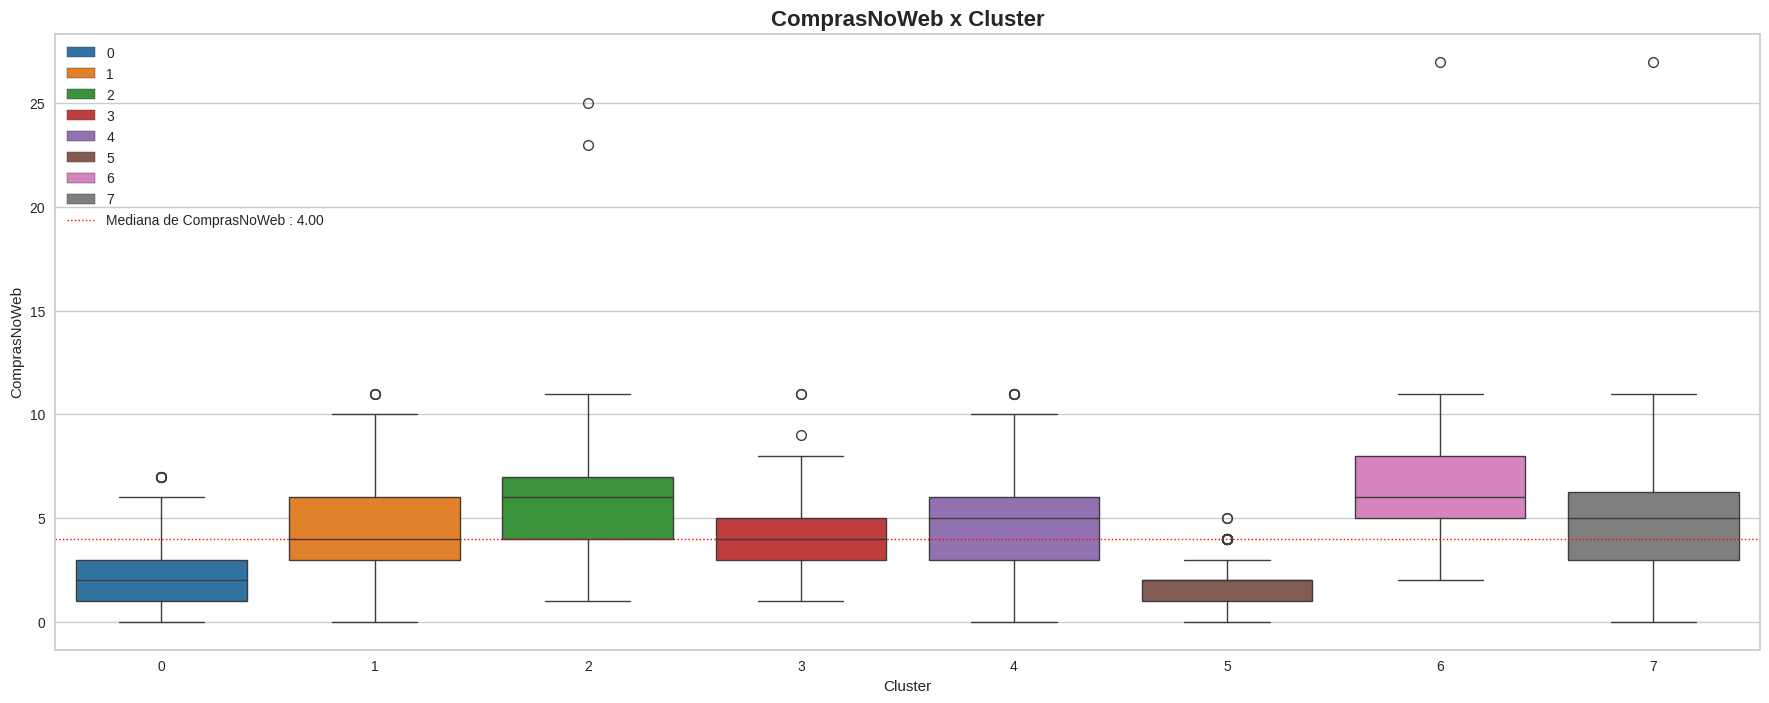

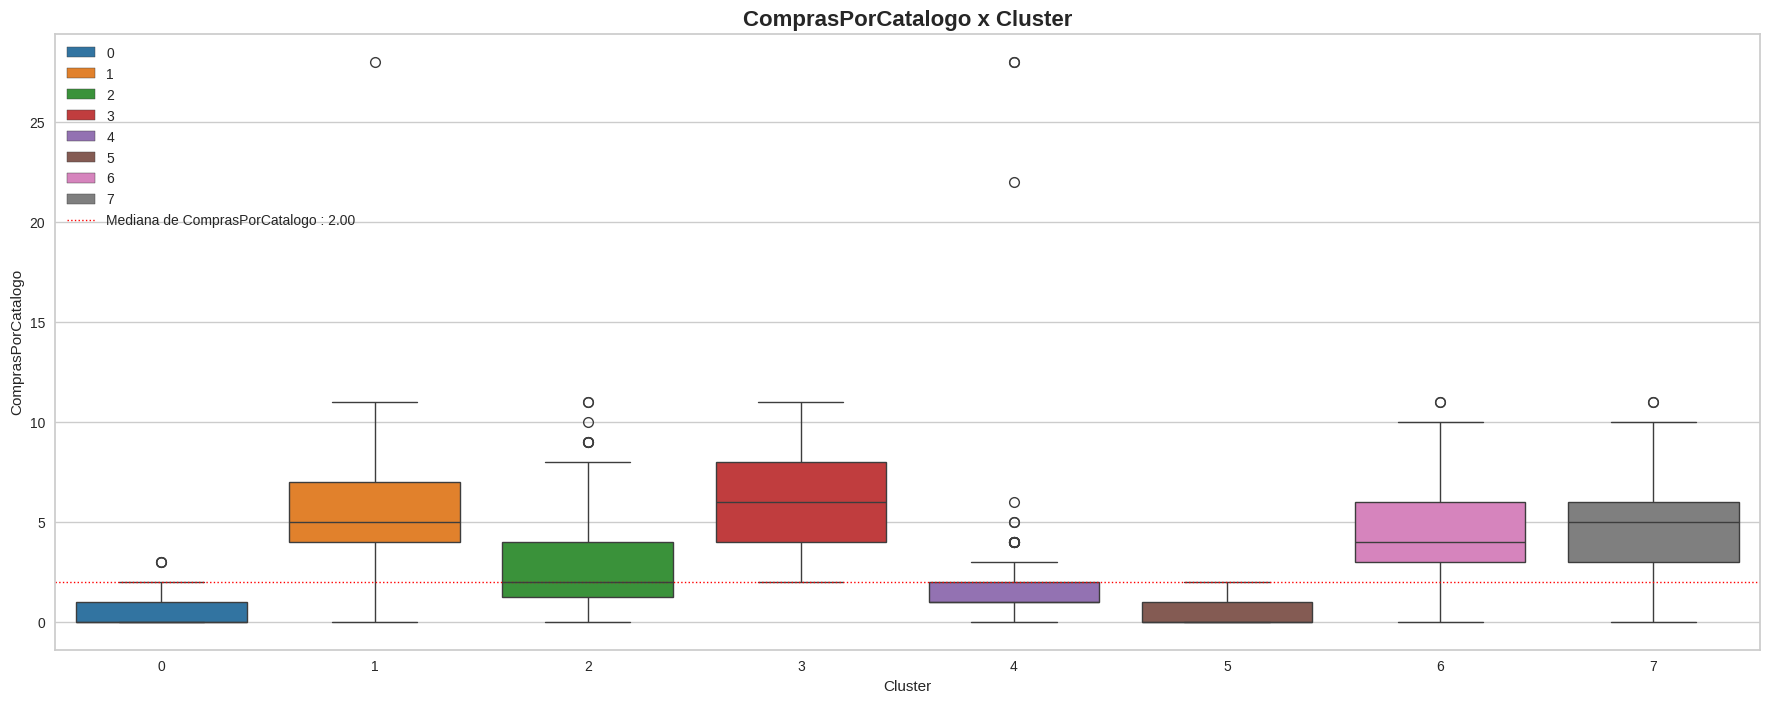

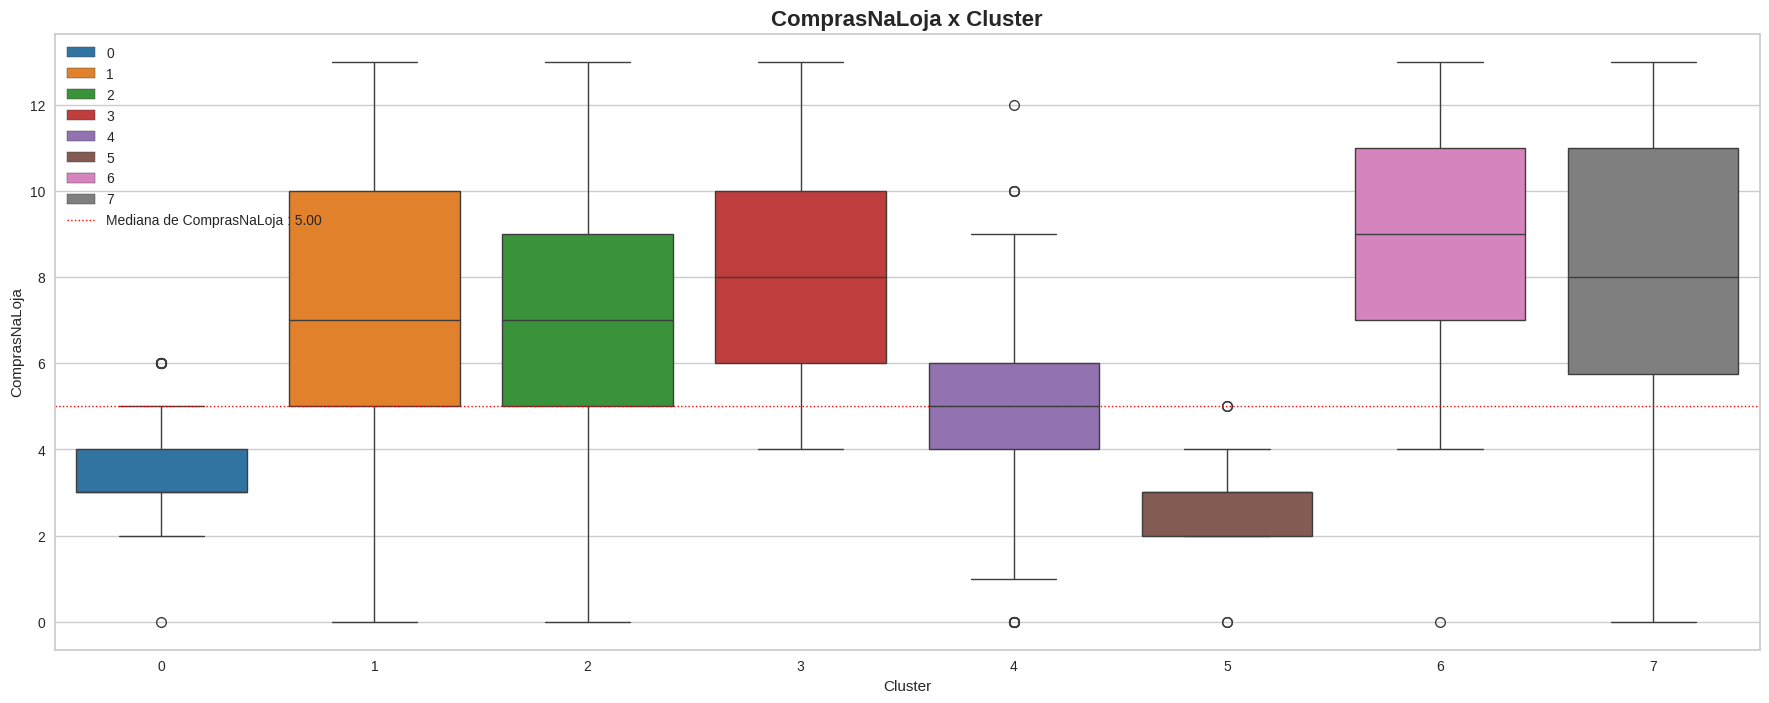

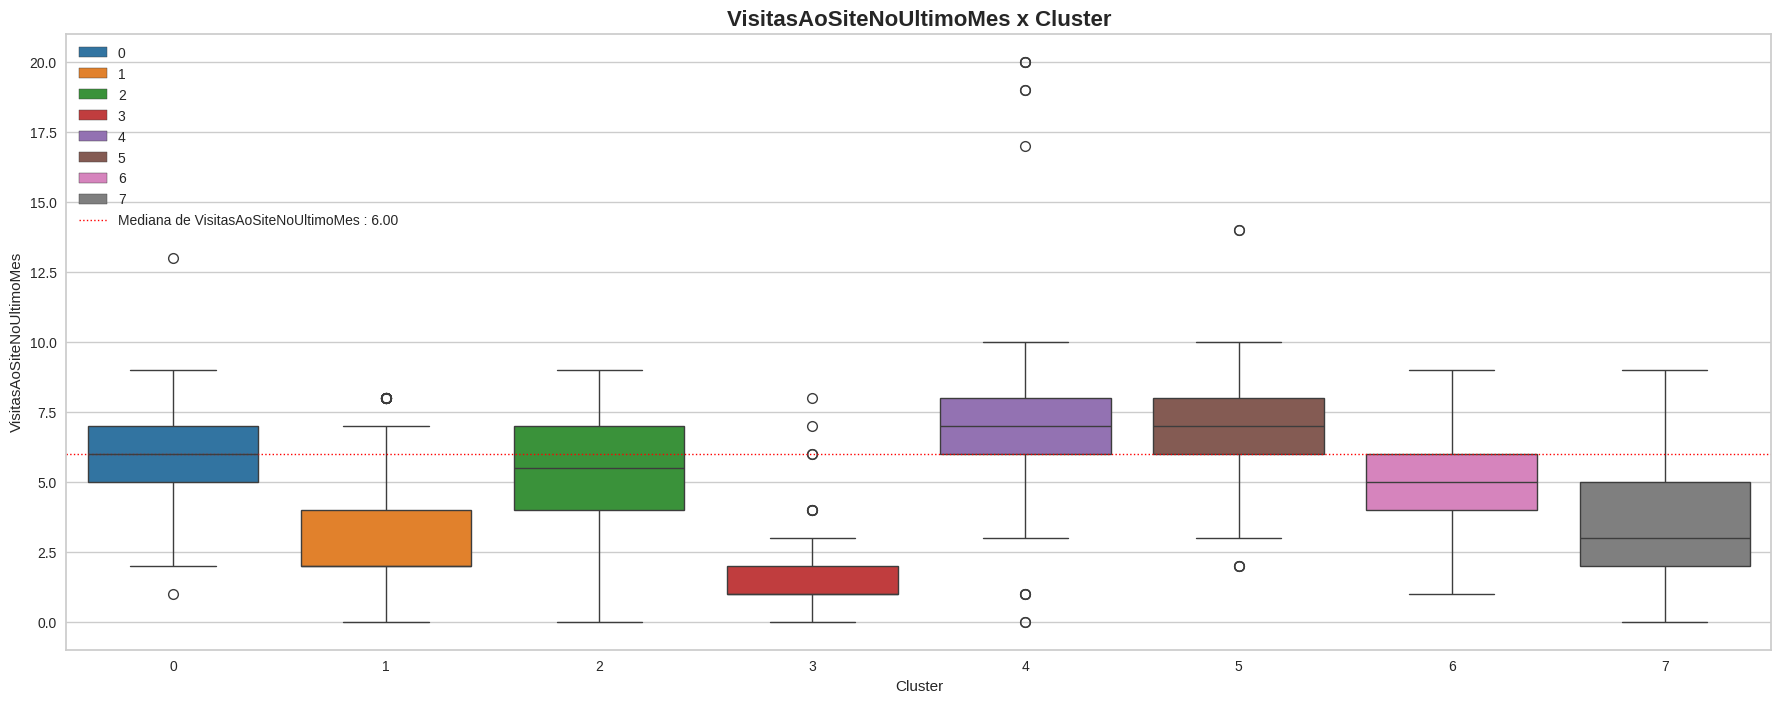

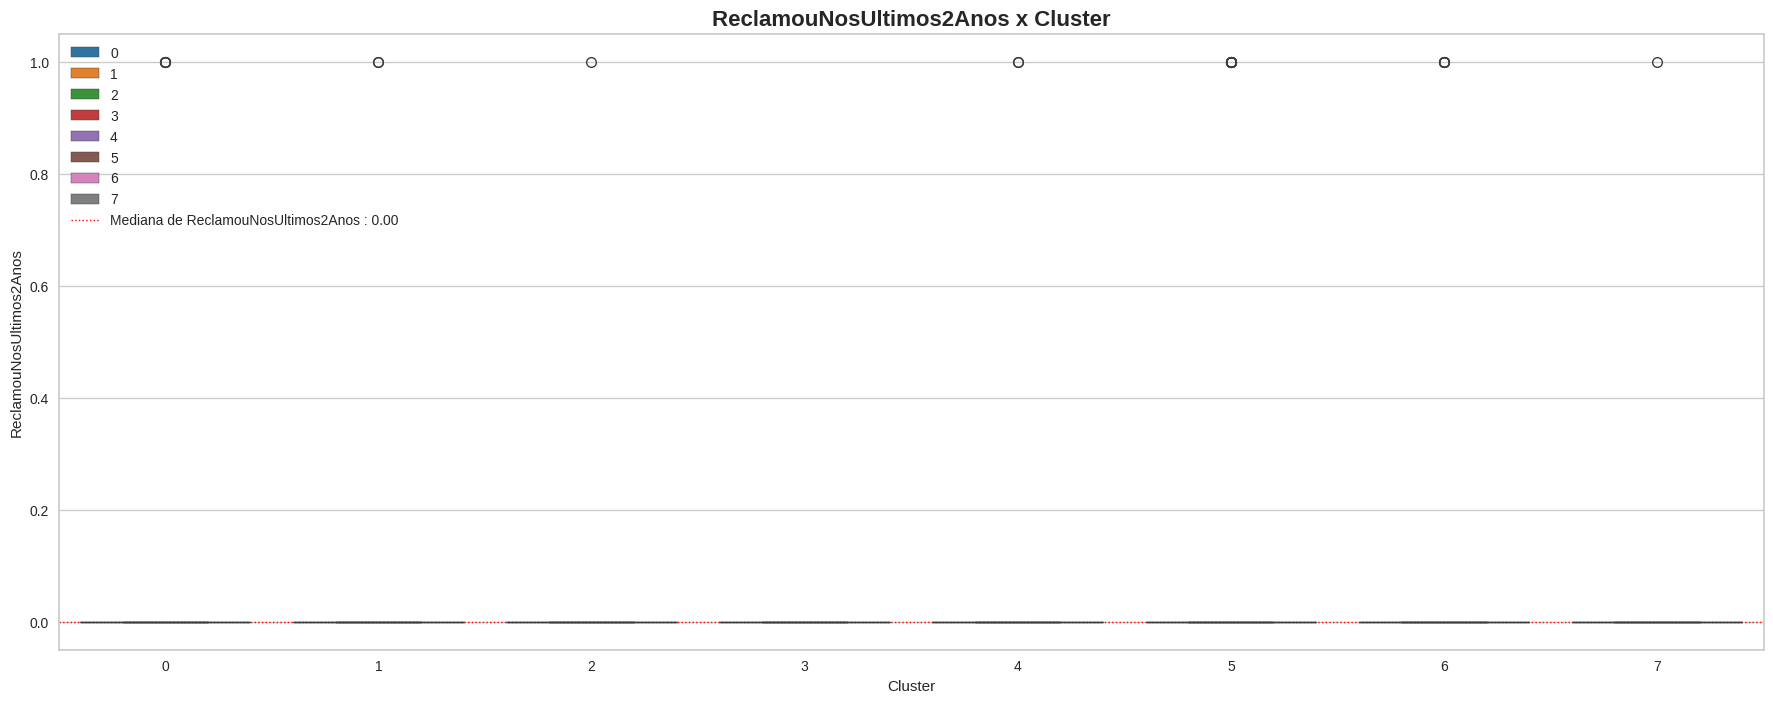

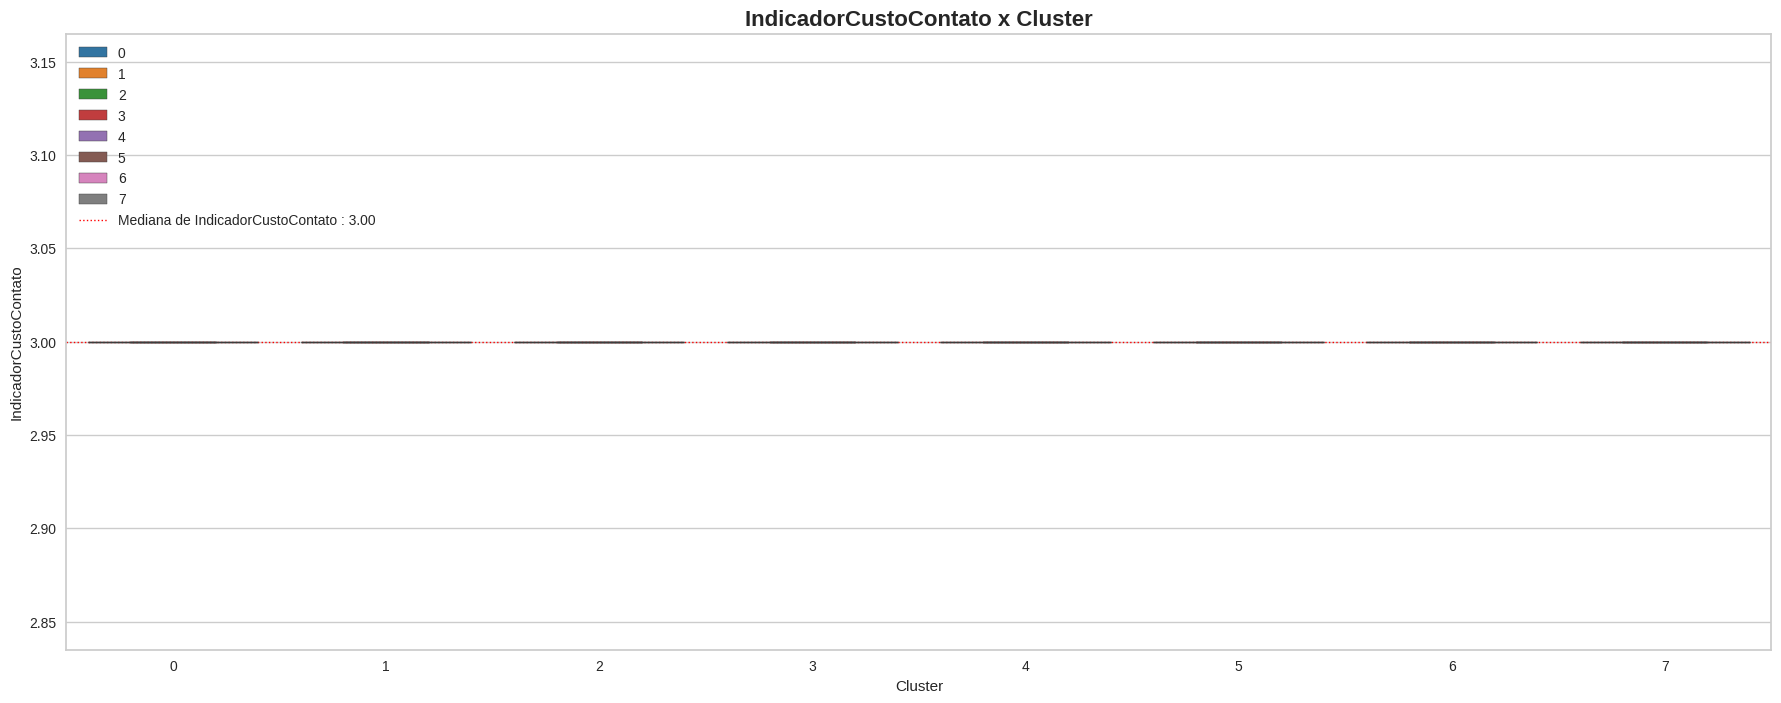

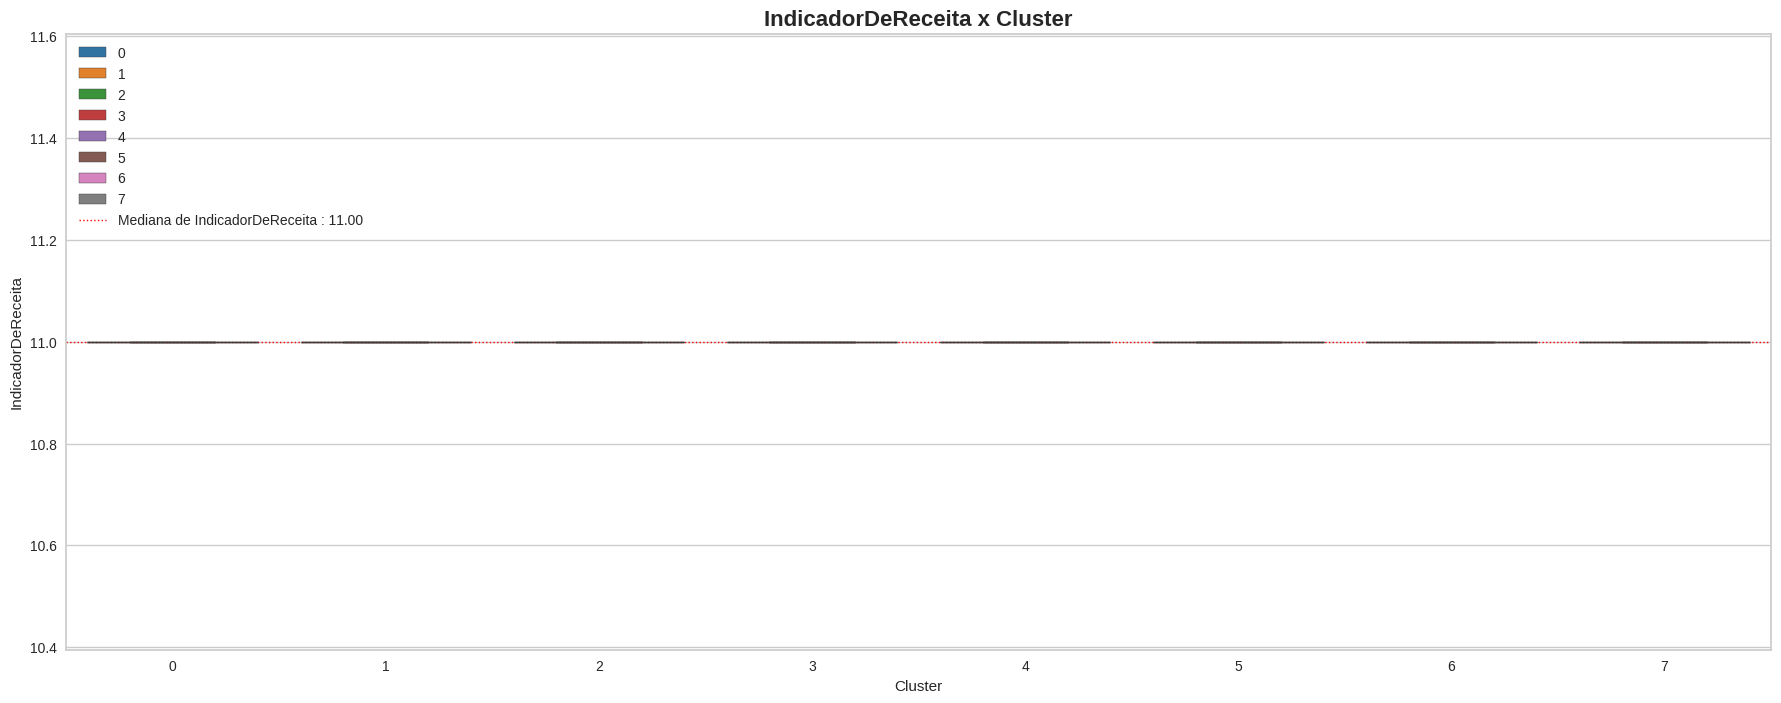

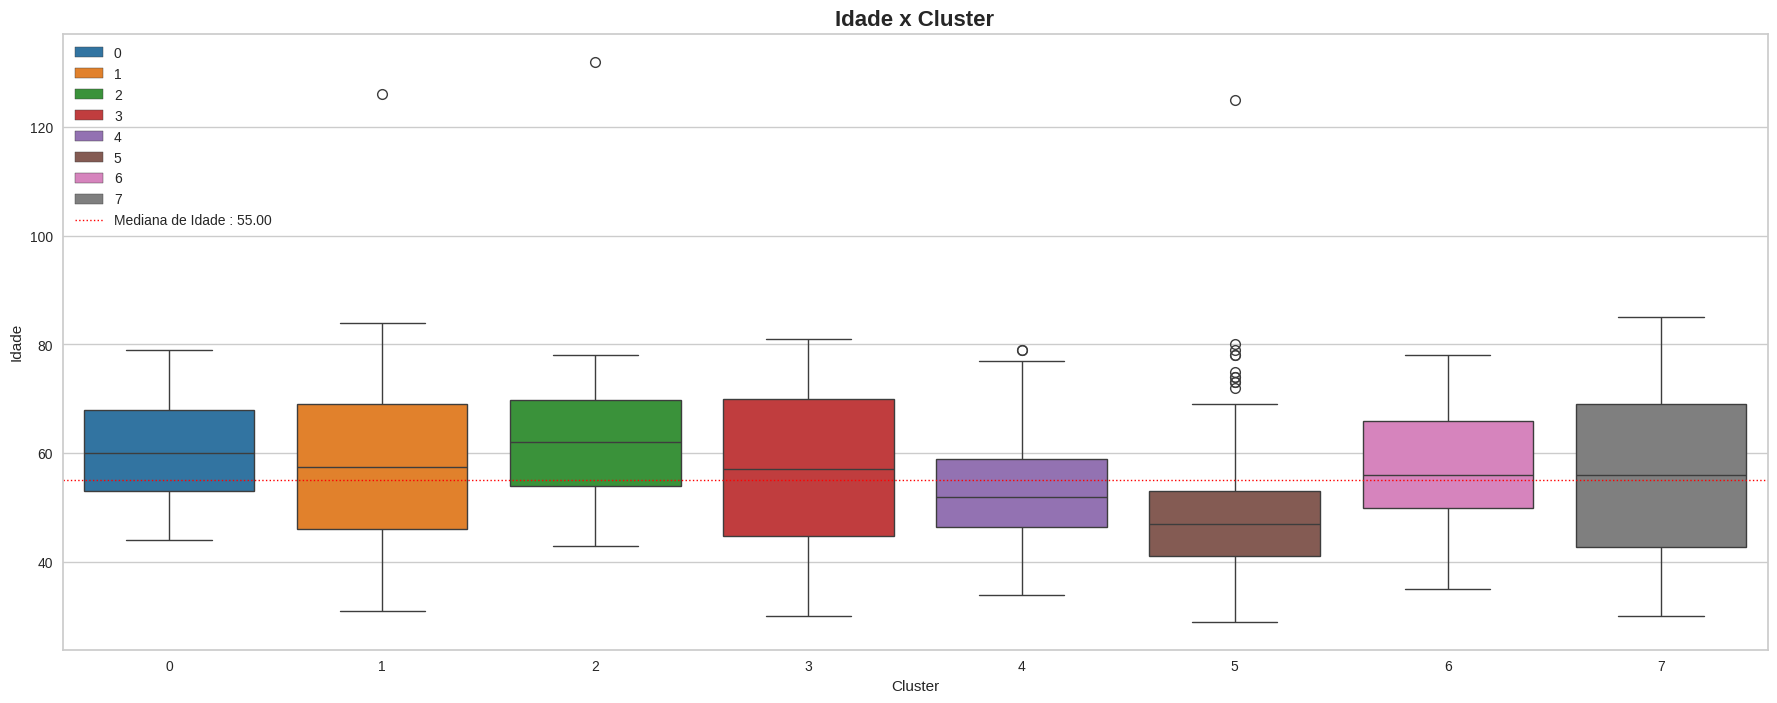

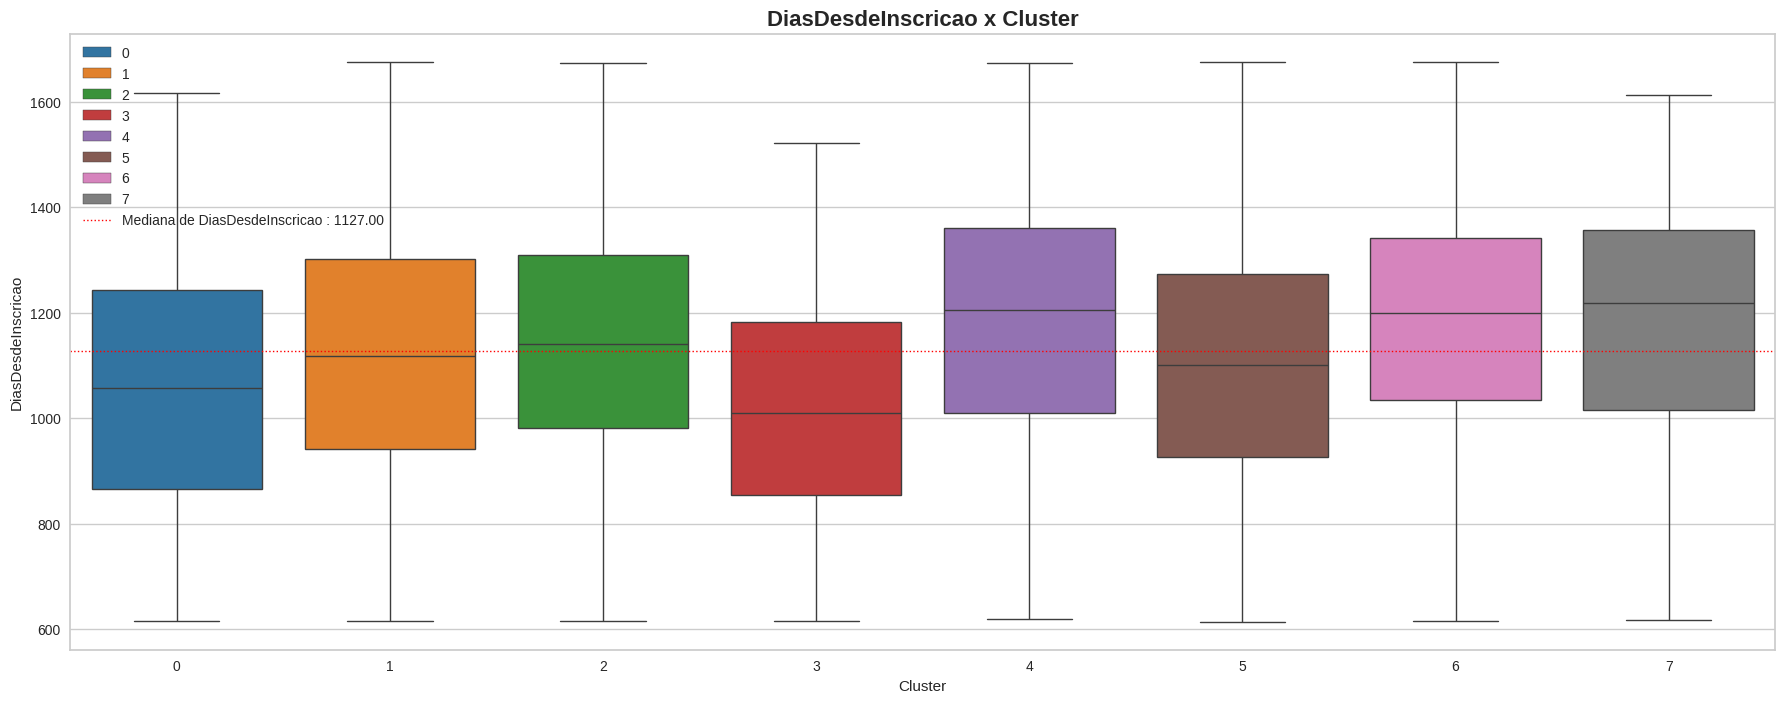

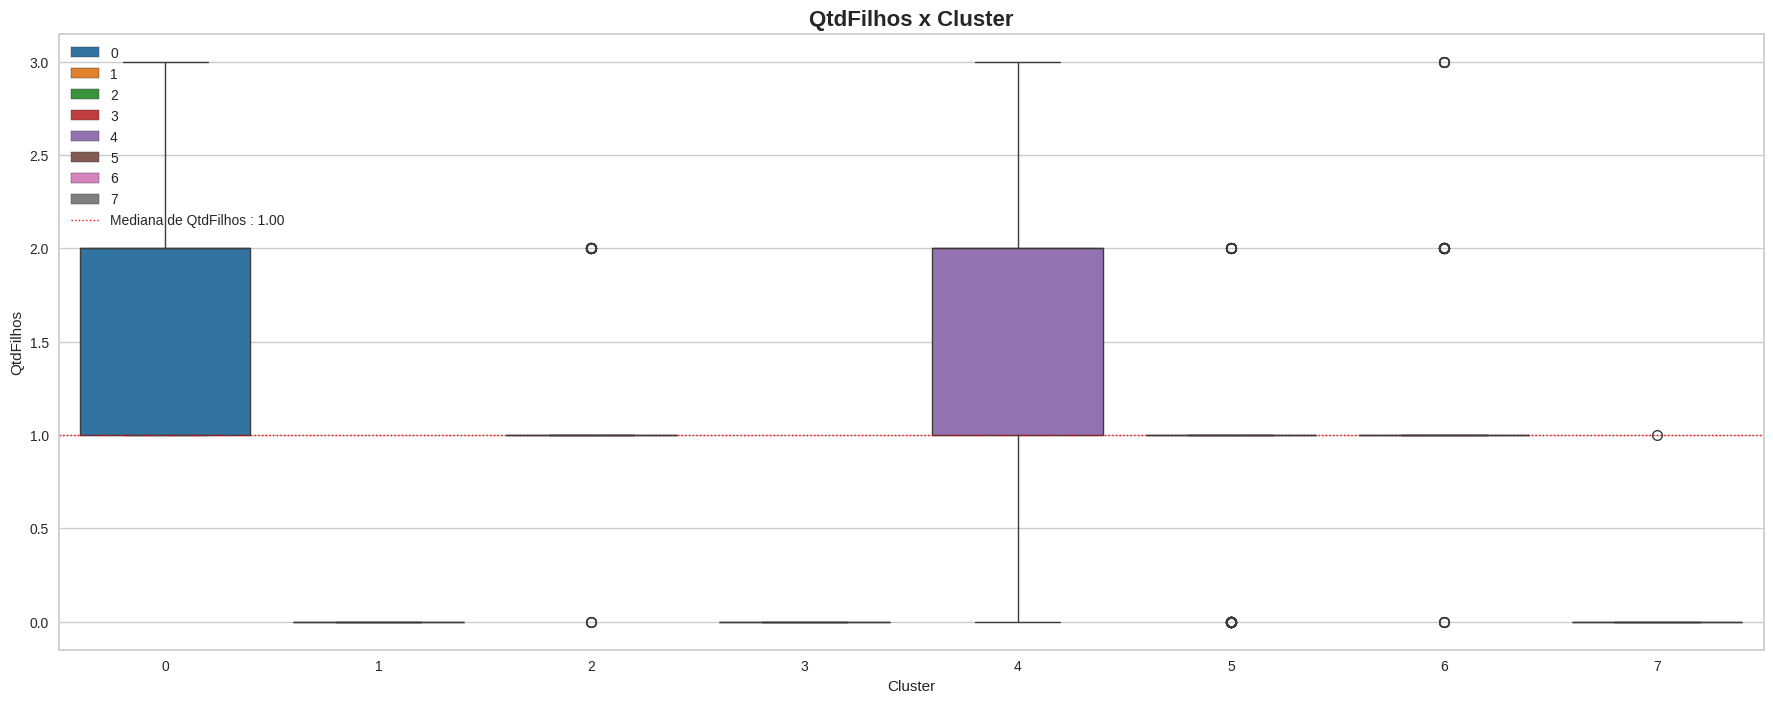

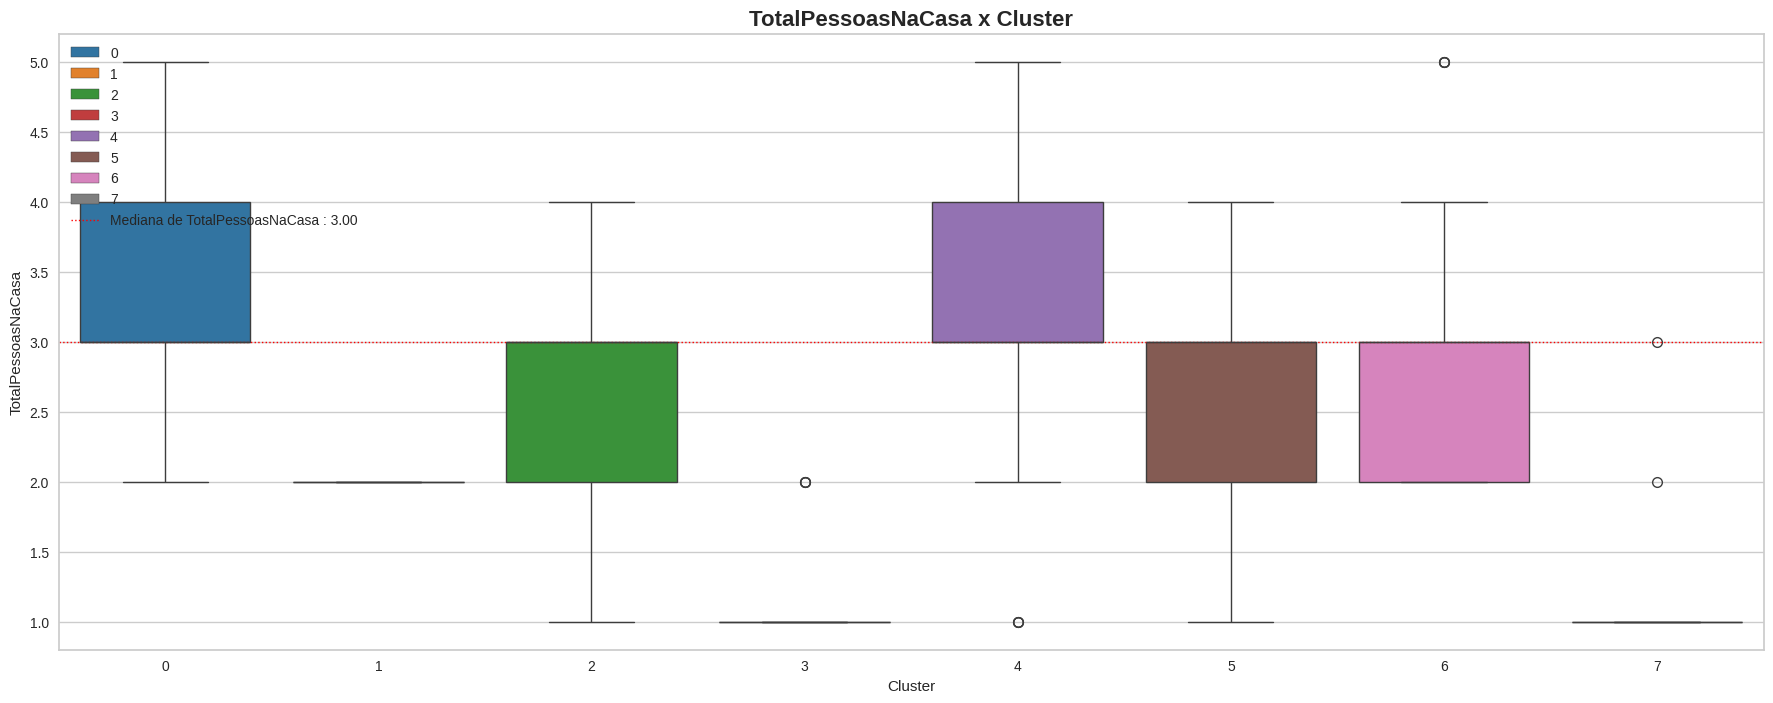

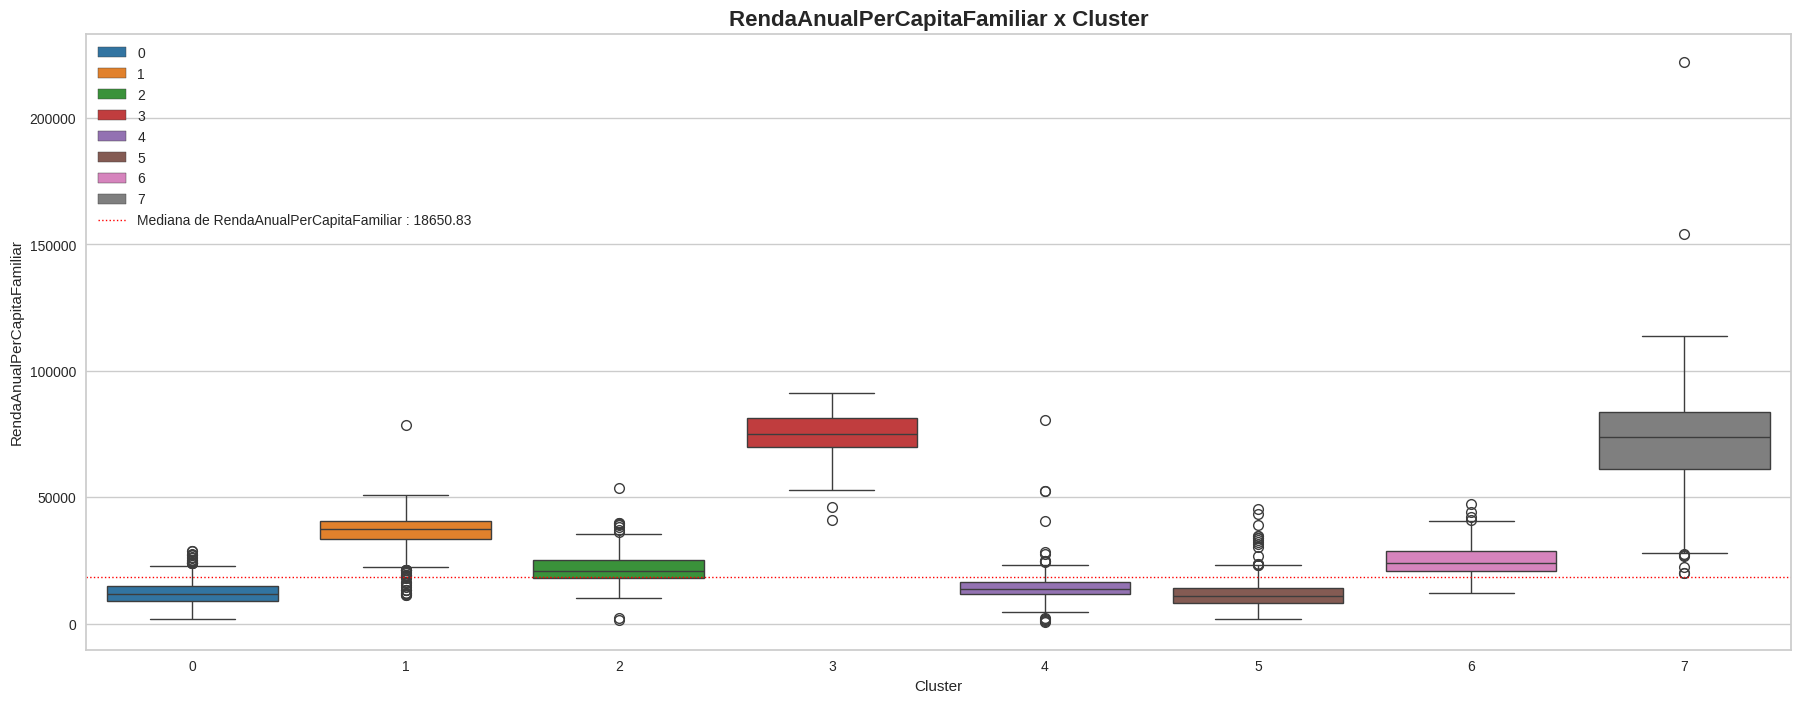

In [25]:
vars2 = list(num_attributes.columns).copy()
cols_to_remove = ['AceitouCampanha1','AceitouCampanha2','AceitouCampanha3','AceitouCampanha4','AceitouCampanha5','AceitouUltimaCampanha','AceitouAlgumaCampanha']
vars2 = [col for col in vars2 if col not in cols_to_remove]

vars_numericas = vars2

for var in vars_numericas:
  plt.figure(figsize=(22, 8))
  pl=sns.boxplot(x=df_publico["Cluster"], y=df_publico[var], palette= pal, hue=df_publico["Cluster"])

  mediana = df_publico[var].median()
  # Adicionando uma linha indicando a média da variável de aceitacao
  text = f'Mediana de {var} :'+' {:.2f}'.format(mediana)
  plt.axhline(mediana, color='red', linestyle='dotted', linewidth=1, label=text)

  pl.set_title(f"{var} x Cluster", fontsize=16, fontweight='bold')
  plt.legend(loc='upper left')
  plt.show()

**Insights:**

- Renda Anual

 - Pessoas dos clusters 1, 2, 3, 6 e 7 estão acima da mediana geral, sendo o cluster 7 o mais alto deles;

 - Clientes dos clusters 0, 4 e 5 estão abaixo da mediana geral, sendo o cluster 5 o mais baixo de todos.

- Quantidade de crianças em casa

 - Pessoas dos clusters 1, 2, 3 e 7 (com algumas excessões) não possuem crianças em casa;

 - Pessoas dos clusters 0 e 6 possuem de 0 a 2 crianças;

 - Pessoas dos clusters 4 e 5 possuem em média 1 criança em casa, exceto por algumas excessões com 0 ou com 2 crianças.

- Quantidade de adolescentes em casa

 - Os clusters 1, 3, 5 e 7 não possuem adolescentes em casa;

 - Já os clusters 0, 2 e 6 possuem em média 1, com algumas excessões tanto para 0 quanto para 2;

 - O único clusters que tem de 0 a 2 adolescentes é o cluster 4.

- Dias desde a última compra

 - Os clusters estão bem distribuidos, sem apresentar grande distinção entre eles.

- Gasto com vinho

 - Os clusters 1 e 7 são os que mais gastam com vinho, ficando bem acima da mediana geral;

 - Os clusters 2, 3 e 6 não ficam muito atrás, também estando acima da mediana geral;

 - Já os clusters 0, 4 e 5 não gastam muito com esse produto, ficando abaixo da mediana geral;

 - O cluster 5 gastou extremamento pouco com vinho nos últimos dois anos, sendo o cluster que menos consumiu este produto.

- Gastos com frutas

 - O cluster 3 foi disparadamente o que mais gastou com frutos nos últimos anos, seguido dos clusters 6, 1 e 7;

 - Já os clusters 2 e 4 gastaram bem próximo a mediana geral;

 - Os clusters 0 e 5 são os que menos gastaram, não sendo bons consumidores destes produtos.

- Gastos com carne

 - Os grupos 7, 1, 3 e 6 são os que mais consumiram carne nos ultimos anos, sendo o grupo 7 o que mais consumiu;

 - Os grupos 2 e 4 consumiram muito perto da mediana geral;

 - Porém os grupos 0 e 5 consumiram bem abaixo da mediana geral.

- Gastos com peixes

 - O grupo 3 foi o que mais gastou com peixes, ficando bem acima da mediana geral;

 - Além disso, os grupos 1, 6 e 7 também consumiram bastante este produto;

 - Já os grupos 2 e 4 ficaram próximos a mediana geral;

 - Diferente dos grupos 0 e 5 que ficaram abaixo, sendo o grupo 0 o mais baixo entre eles.

- Gastos com doces

 - Os grupos 6 e 3 foram os maiores consumidores de doces, seguidos dos grupos 1 e 7;

 - Os grupos 2 e 4 ficaram na mediana geral, tendo um consumo moderado de doces;

 - Já os grupos 5 e 0 ficaram abaixo da mediana, porém existindo algumas excessões acima dela.

- Gasto com ouro

 - O grupo 3 é o que mais gastou com ouro nos últimos 2 anos, porém o indivíduo que mais gastou está no grupo 6, que também compra bastante esse produto;

 - Os grupos 1, 2, 4, 6 e 7 também estão acima da mediana geral;

 - Já os grupos 0 e 5 estão abaixo da mediana geral, mostrando que compram menos esse produto.

- Compras com desconto

 - O grupo 4 é o que mais realizou compras com desconto, seguido dos grupos 2, 6 e 0;

 - Já os grupos 1, 3 e 7 realizaram poucas compras com desconto.

- Compras no Web

 - A maioria dos grupos realiza uma quantidade mediana ou superior de compras no site, restando apenas os grupos 0 e 5 com poucas compras no site.

- Compras por catálogo

 - Os grupos 3, 1, 7 e 6 realizaram mais compras no catálogo que os outros grupos;

 - Já o grupo 2 apresentam um nível mediana de compras;

 - Os níveis 0, 4 e 5 compram pouco utilizando o catálogo.

- Compras na loja

 - O grupo 6 é o que mais realiza compras na loja, seguido dos grupos 7, 3, 1 e 2;

 - O grupo 2 apresentam um nível de compras na loja mediano;

 - Já os grupos 1 e 5 quase não realizaram compras na loja.

- Visitas ao site no último mês

 - Apesar de quase não realizar compras online, as pessoas do grupo 5 são algumas das que mais visitam o site, junto com as do grupo 4;

 - As pessoas do grupo 0 visitam o site moderadamente, apesar de não comprarem muito por lá também;

 - Já as pessoas dos grupos 1, 2, 3, 6 e 7 quase não acessaram ao site no último mês, sendo o grupo 3 o que menos acessou.

- Idade

 - Pessoas dos clusters 1, 3 e 7 tendem a ser mais velhas que as dos outros grupos;

 - Os grupos que estão abaixo da mediana de idade são os grupos 4 e 5, sendo o grupo 5 aparentemente o mais novo entre eles.

- Dias desde a inscrição

 - A distribuição está bem equilibrada, sendo o grupo 3 o que tem menos dias de inscrição entre todos eles.

- Renda anual per capita

 - Os grupos 3 e 7 apresentam uma renda per capita bem superior aos demais;

 - Os grupos 1, 2 e 6 também estão acima da mediana geral;

 - Os grupos 0, 4 e 5 tem uma renda per capita menor que os outros.

### 4.4.5 Verificando a taxa de aceitação por campanha por cluster

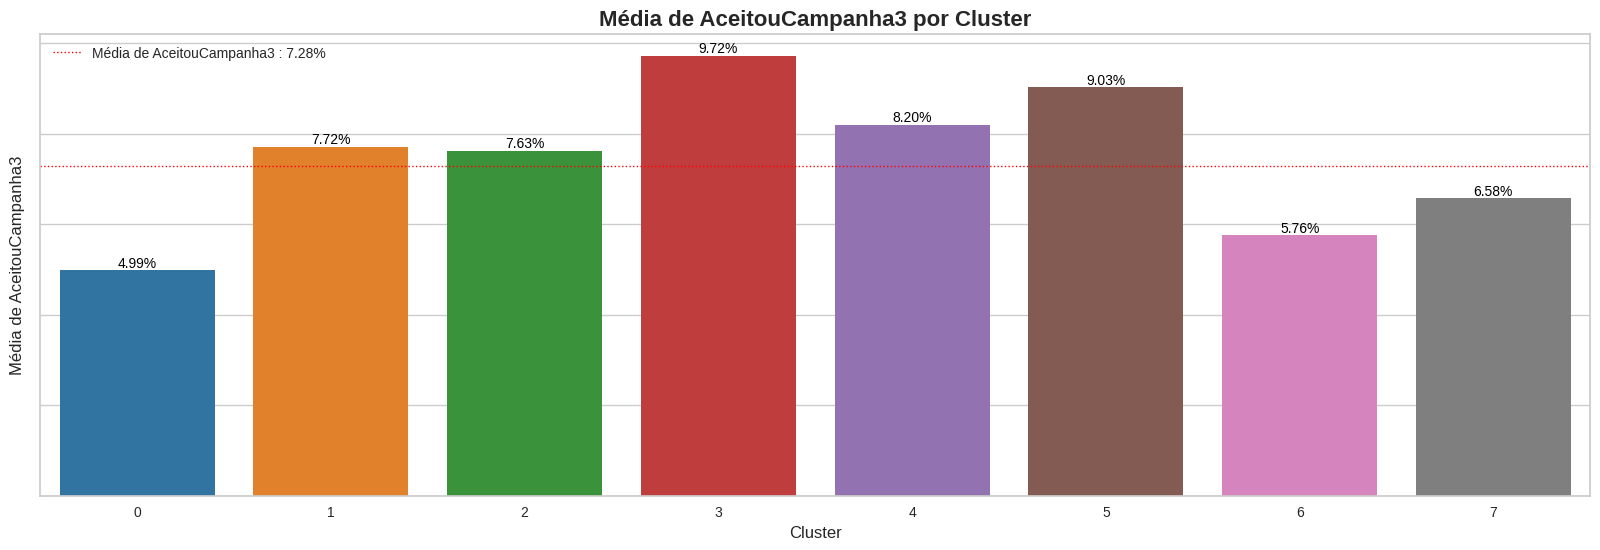

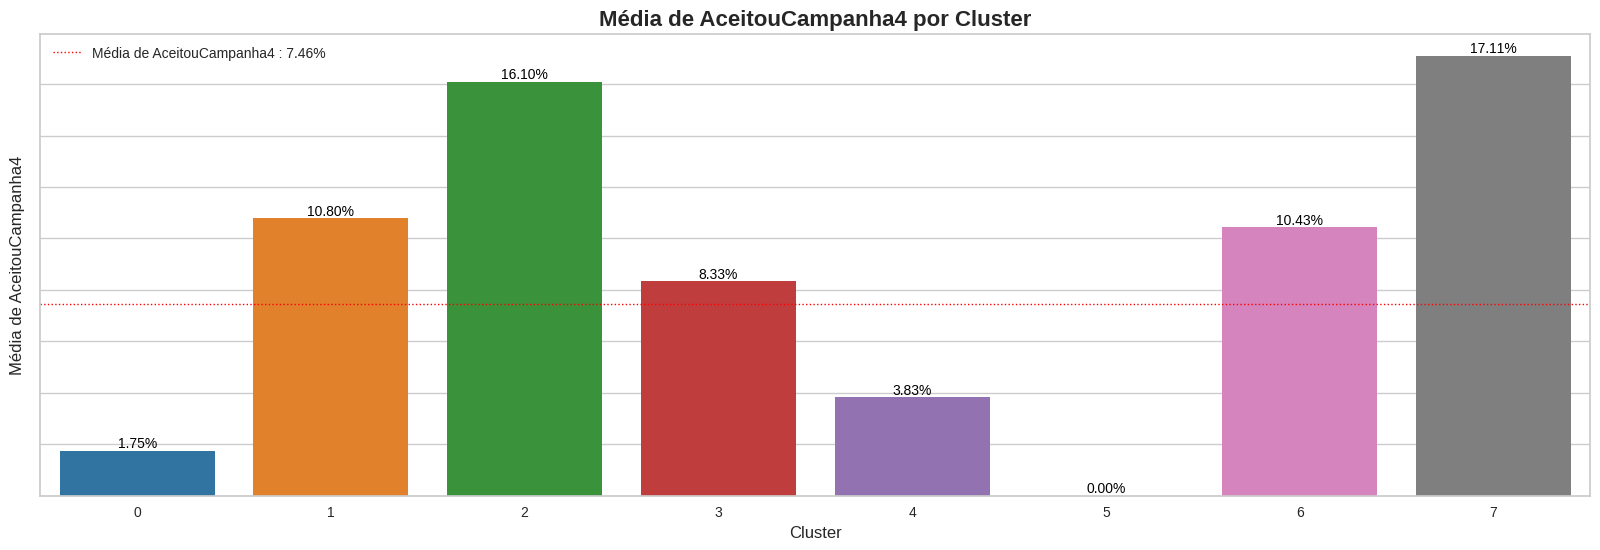

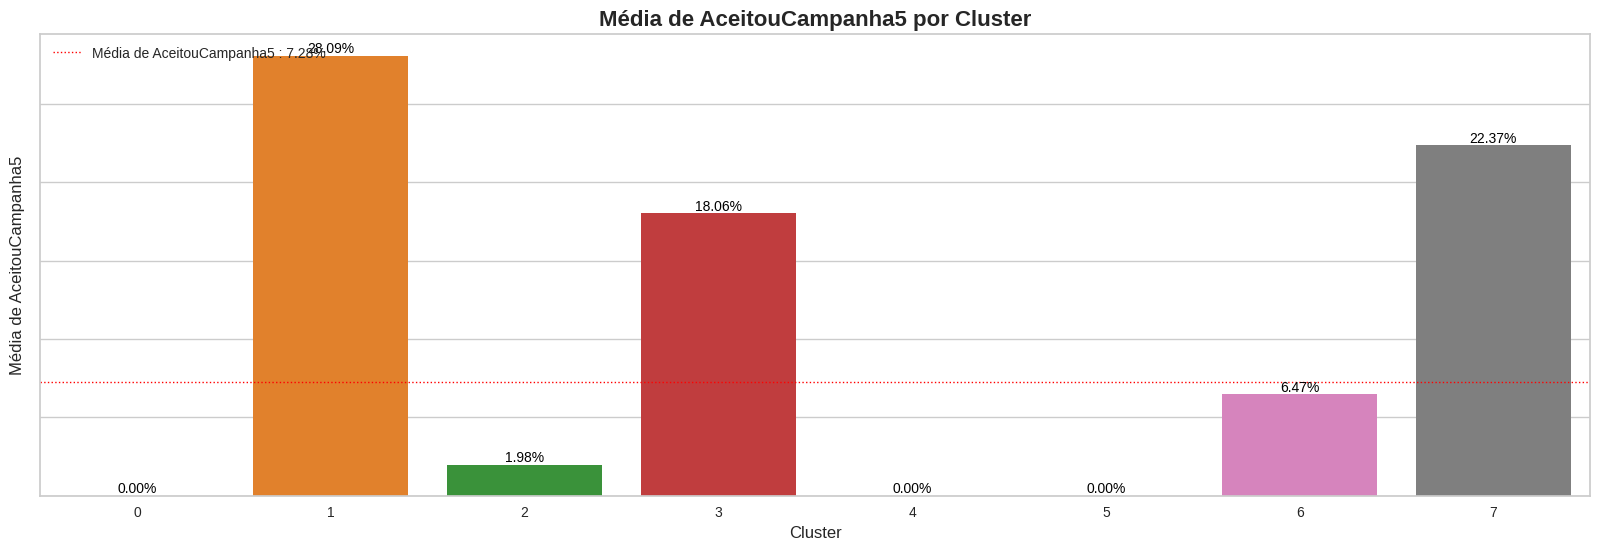

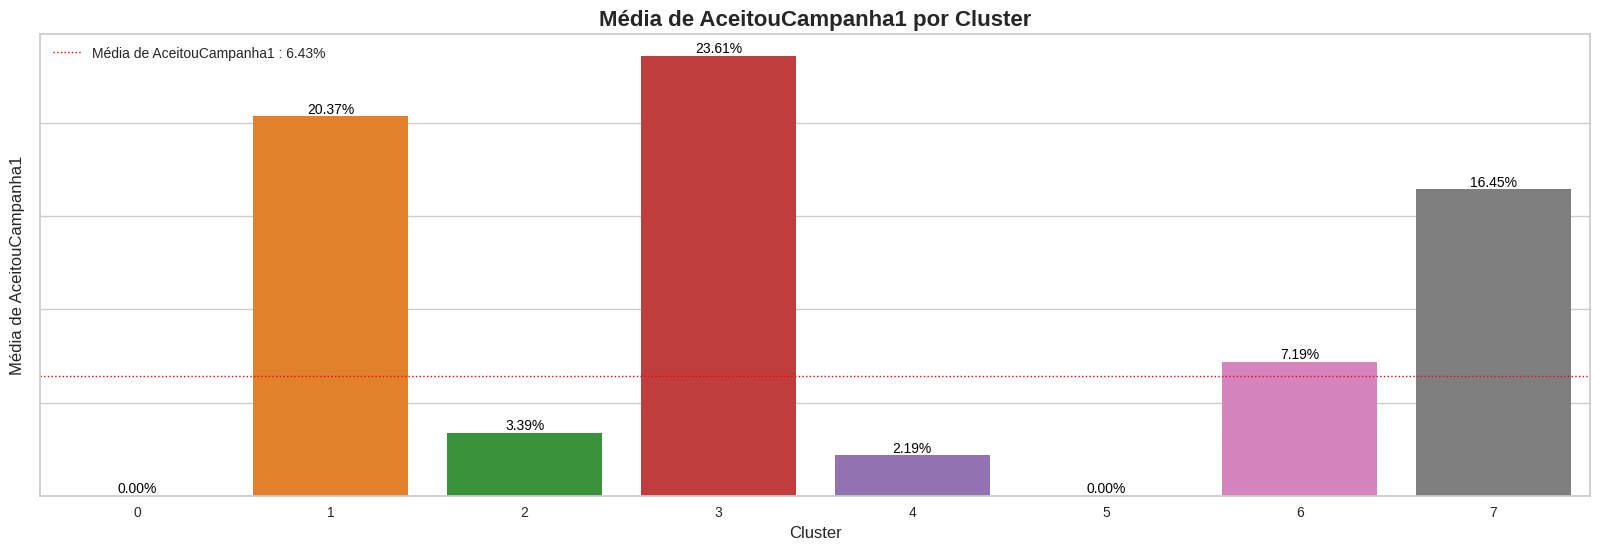

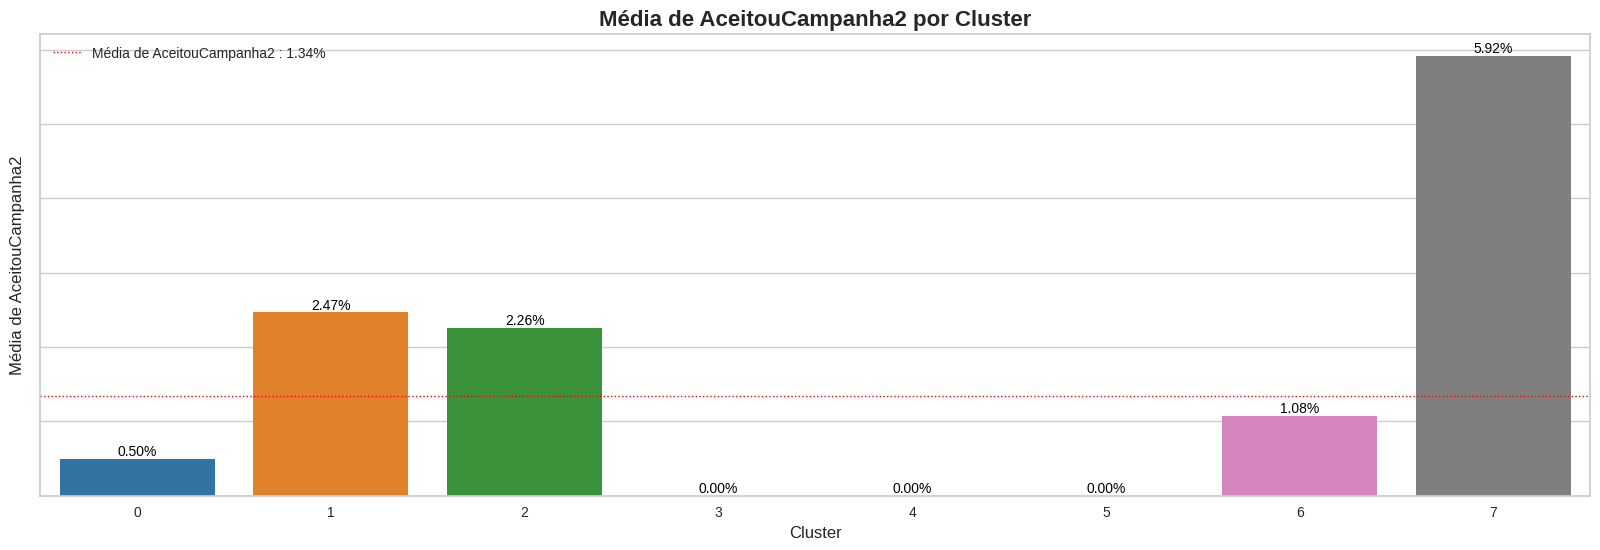

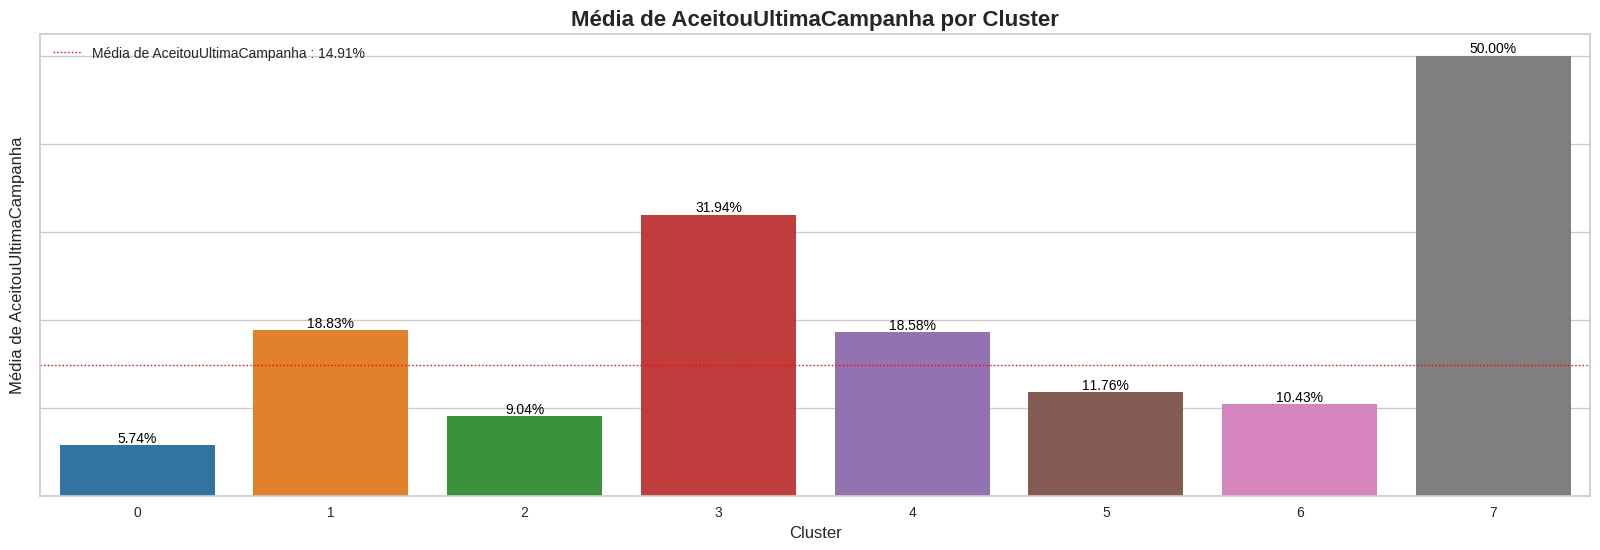

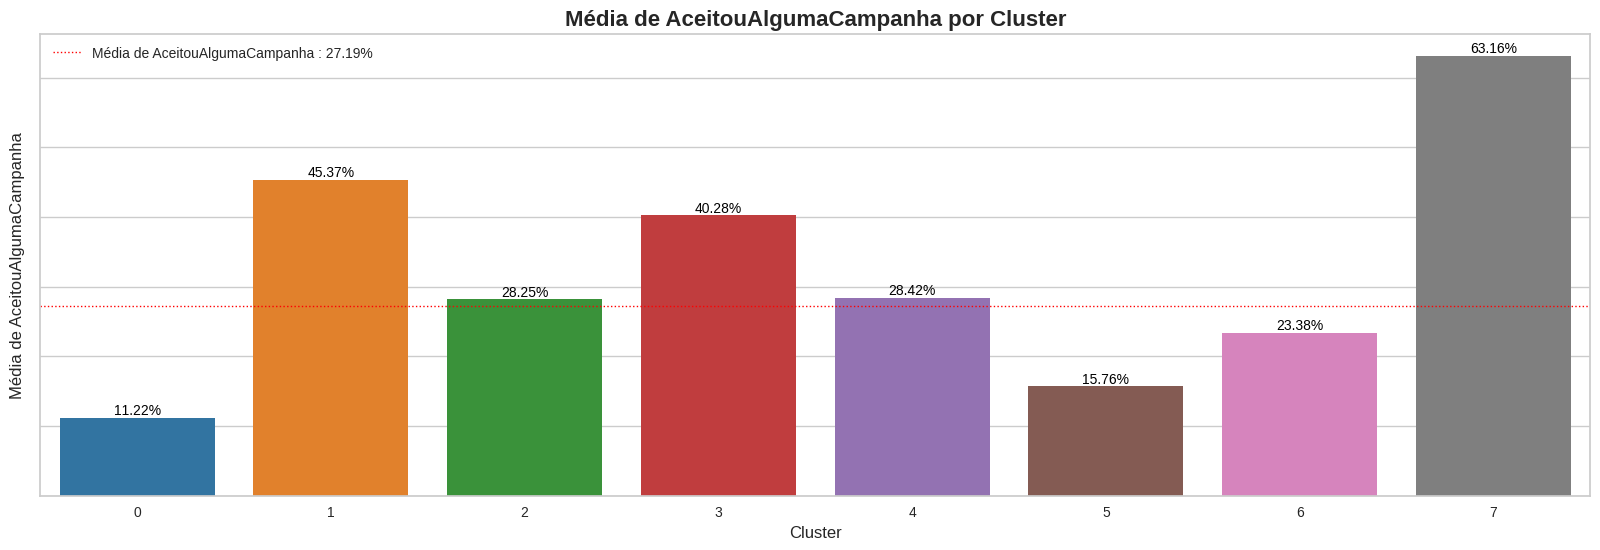

In [22]:
filtered_vars = [var for var in vars2 if 'AceitouCampanha' in var or 'AceitouUltimaCampanha' in var or 'AceitouAlgumaCampanha' in var]

for var in filtered_vars:
    plt.figure(figsize=(20, 6))
    ax = sns.barplot(data=df_publico, x='Cluster', y=var, estimator='mean', errorbar=None, palette= pal)
    plt.title(f"Média de {var} por Cluster", fontsize=16, fontweight='bold')
    plt.xlabel('Cluster', fontsize=12)
    plt.ylabel(f'Média de {var}', fontsize=12)

    media = df_publico[var].mean()
    # Adicionando uma linha indicando a média da variável de aceitacao
    text = f'Média de {var} :'+' {:.2f}%'.format(100*media)
    plt.axhline(media, color='red', linestyle='dotted', linewidth=1, label=text)

    # Adicionando os valores no topo de cada barra
    for p in ax.patches:
        ax.annotate(f'{100*p.get_height():.2f}%',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    fontsize=10, color='black',
                    xytext=(0, 5),
                    textcoords='offset points')
    plt.gca().axes.yaxis.set_ticklabels([])
    plt.legend(loc='upper left')
    plt.show()

**Insights:**

- Aceitação da campanha 3

 - Os grupos 3 e 5 foram os que melhor aceitaram a campanha 3, mas os grupos 1, 2 e 4 também ficaram acima da média;

 - Já os grupos 0, 6 e 7 não aceitaram bem essa campanha.

- Aceitação da campanha 4

 - Os grupos 7 e 2 aceitaram muito bem a campanha 4, ficando com uma taxa de aceitação mais de 2 vezes maior que a média;

 - Os grupos 1, 6 e 3 também aceitaram bem, ficando acima da média;

 - Já os grupos 0, 4 e 5 não aceitaram muito bem, ficando muito abaixo da média, inclusive nenhum cliente do grupo 5 aceitou essa campanha.

- Aceitação da campanha 5

 - 28,09% das pessoas do grupo 1 aceitaram a camapnha 5, um valor muito acima da média que é 7,28%;

 - Além disso os grupos 7 e 3 também aceitaram bem, ficando com 22,37% e 18,06% respectivamente;

 - Porém os grupos 2 e 6 não aceitaram muito bem, ficando abaixo da média geral;

 - Nenhum cliente nos grupos 0, 4 e 5 aceitou a campanha 5.

- Aceitação da campanha 1

 - A campanha 1 foi bem aceita pelos grupos 3 e 1, com 23,61% e 20,37% de aceitação respectivamente;

 - Já os grupos 7 e 6 também aceitaram bem, com 16,45% e 7,19%;

 - Os grupos 2 e 4 não aceitaram bem, tendo 3,39% e 2,19% de aceitação;

 - Nenhum cliente dos grupos 0 e 5 aceitou a campanha 1.

- Aceitação da campanha 2

 - A taxa de aceitação geral da campanha 2 foi muito baixa, com apenas 1,34% de aceitação;

 - O grupo 7 foi o que melhor aceitou essa campanha, com 5,92% de aceitação;

 - Os grupos 1 e 2 foram os únicos acima dessa média, com pouco mais de 2% cada;

 - Os grupos 0 e 6 tiveram uma aceitação abaixo da média;

 - Já os grupos 3, 4 e 5 não tiveram nenhuma aceitação dessa campanha.

- Aceitação da última campanha

 - Foi a campanha que obteve a maior média de aceitação, com 14,91%;

 - O grupo 7 foi o que melhor aceitou, com 50% de aceitação, seguido dos grupos 3 (com 31,94%), grupo 1 (com 18,83%) e grupo 4 (com 18,58%);

 - O restante do grupos ficou abaixo da média, sendo o grupo 0 o que teve menor aceitação com 5,74%;

 - Vale notar que nenhum grupo deixou de aceitar essa campanha.

- Aceitação de alguma campanha

 - O grupo 7 foi o que mais aceitou alguma das campanhas, com 63,16% de aceitação;

 - Após ele vem os grupos 1 (com 45,37%) e grupo 3 (com 40,28%);

 - Os grupos 2 e 4 estão bem próximos a média, com pouco mais de 28% de aceitação;

 - Já os grupos 0, 5 e 6 estão abaixo da média;

 - O grupo 1 é o menor deles, com 11,22% de taxa de aceitação.


# 5- Recomendações de Negócio

## 5.1 Recomendações gerais

- Foquem as campanhas em pessoas que tem uma renda familiar acima da média, pois elas são mais suscetíveis a comprar os produtos;

- Clientes com uma menor quantidade de filhos tendem a comprar mais produtos, então também é interessante focar nesses grupos.

## 5.2 Recomendações por tipo de produto

### 5.2.1 Vinho

- Foque campanhas de vinhos nos clientes dos grupos 1, 2, 3, 6 e 7, pois eles tem uma tendência maior a comprar este produto.

### 5.2.2 Frutas

- Os clientes que mais consomem frutas são os clientes dos grupos 1, 3, 6 e 7, então talvez seja interessante direcionar anuncior destes produtos a eles.

### 5.2.3 Carne

- Clientes dos grupos 1, 3, 6 e 7 consomem mais carne que os demais, então esse pode ser um produto interessante de ofertar.

### 5.2.4 Peixe

- Peixes também são bem consumidos pelos clientes dos grupos 1, 3, 6 e 7, então é um bom produto para ser oferecido.

### 5.2.5 Doces

- Segue o mesmo padrão dos anteriores, os clientes dos grupos 1, 3, 6 e 7 consomem mais do que os demais, apesar de não ser um produto que trás muita receita.

### 5.2.6 Ouro

- Além dos grupos 1, 3, 6 e 7, o grupo 2 também gasta acima da média com esse produto, mas não é o tipo de produto que trás uma grande quantidade de receita.

### 5.2.7 Geral

- Carnes e vinhos são os produtos que tem o maior valor de consumo, então pode ser interessante focar neles se estivermos pensando em quantidade de receita.

## 5.3 Tipos de compras

- Pessoas dos grupos 2, 4 e 6 adoram comprar com desconto, então oferecer cupons para eles pode mudar sua decisão de comprar ou não;

- Foque as compas no web nos clientes dos grupos 2, 4, 6 e 7, pois eles realizam compras por lá com mais frequência;

- Já em compras por catálogo, os clientes dos grupos 1, 3, 6 e 7 se destacam nesse quesito;

- A maioria dos clientes gosta de comprar na loja, com destaque para os grupos 3, 6 e 7 que possuem mais compras que os demais.

## 5.4 Campanhas

- Os grupos 1, 3 e 7 são os que tiveram a aceitação mais alta, então talvez seja interessante focar mais campanhas especificamente nestes clientes, pois eles tem um alto potencial de trazer ganhos.